# Проект: Проект: Обучение с учителем: качество модели.

<div style="font-size: 20px; font-weight: bold;">Введение</div>


Интернет-магазин «В один клик» заметил снижение покупательской активности среди своих постоянных клиентов. В условиях насыщенности рынка и высокой осведомленности целевой аудитории о бренде, привлечение новых клиентов становится менее эффективным. Чтобы сохранить и повысить активность текущих клиентов, компания решила использовать персонализированные предложения.

Для принятия обоснованных решений, руководство компании предпочитает использовать анализ данных и бизнес-моделирование. В рамках данного проекта нам предстоит разработать модель машинного обучения, которая позволит прогнозировать вероятность снижения покупательской активности клиентов в ближайшие три месяца. Кроме того, на основании данных о прибыльности клиентов будет выполнена сегментация, что позволит создать таргетированные предложения для различных групп клиентов.

<div style="font-size: 20px; font-weight: bold;">Описание данных</div>
<p></p>
<div style="font-size: 16px; font-weight: bold;">market_file.csv</div>
Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

- **id** — номер покупателя в корпоративной базе данных.
- **Покупательская активность** — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- **Тип сервиса** — уровень сервиса, например «премиум» и «стандарт».
- **Разрешить сообщать** — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- **Маркет_актив_6_мес** — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- **Маркет_актив_тек_мес** — количество маркетинговых коммуникаций в текущем месяце.
- **Длительность** — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- **Акционные_покупки** — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- **Популярная_категория** — самая популярная категория товаров у покупателя за последние 6 месяцев.
- **Средний_просмотр_категорий_за_визит** — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- **Неоплаченные_продукты_штук_квартал** — общее число неоплаченных товаров в корзине за последние 3 месяца.
- **Ошибка_сервиса** — число сбоев, которые коснулись покупателя во время посещения сайта.
- **Страниц_за_визит** — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

<div style="font-size: 16px; font-weight: bold;">market_money.csv</div>
Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

- **id** — номер покупателя в корпоративной базе данных.
- **Период** — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- **Выручка** — сумма выручки за период.

<div style="font-size: 16px; font-weight: bold;">market_time.csv</div>
Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

- **id** — номер покупателя в корпоративной базе данных.
- **Период** — название периода, во время которого зафиксировано общее время.
- **минут** — значение времени, проведённого на сайте, в минутах.

<div style="font-size: 16px; font-weight: bold;">money.csv</div>
Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

- **id** — номер покупателя в корпоративной базе данных.
- **Прибыль** — значение прибыли.

<h1>План исследования<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных." data-toc-modified-id="Подготовка-данных.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных.</a></span><ul class="toc-item"><li><span><a href="#Загрузим-данные." data-toc-modified-id="Загрузим-данные.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузим данные.</a></span></li><li><span><a href="#Изучим-общую-информации-о-данных." data-toc-modified-id="Изучим-общую-информации-о-данных.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Изучим общую информации о данных.</a></span></li><li><span><a href="#Выводы." data-toc-modified-id="Выводы.-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Выводы.</a></span></li></ul></li><li><span><a href="#Предобработка-данных." data-toc-modified-id="Предобработка-данных.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных.</a></span><ul class="toc-item"><li><span><a href="#Приведем-названия-столбцов-и-строковые-данные-к-единому-виду." data-toc-modified-id="Приведем-названия-столбцов-и-строковые-данные-к-единому-виду.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Приведем названия столбцов и строковые данные к единому виду.</a></span></li><li><span><a href="#Проверим-данные-на-дубликаты." data-toc-modified-id="Проверим-данные-на-дубликаты.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Проверим данные на дубликаты.</a></span><ul class="toc-item"><li><span><a href="#Проверим--на-явные-дубликаты." data-toc-modified-id="Проверим--на-явные-дубликаты.-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Проверим  на явные дубликаты.</a></span></li><li><span><a href="#Проверим-датафреймы-на-неявные-дубликаты." data-toc-modified-id="Проверим-датафреймы-на-неявные-дубликаты.-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Проверим датафреймы на неявные дубликаты.</a></span></li></ul></li><li><span><a href="#Приведем-данные-к-нужным-типам." data-toc-modified-id="Приведем-данные-к-нужным-типам.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Приведем данные к нужным типам.</a></span></li><li><span><a href="#Объединим-таблицы." data-toc-modified-id="Объединим-таблицы.-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Объединим таблицы.</a></span></li><li><span><a href="#Выводы." data-toc-modified-id="Выводы.-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Выводы.</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных." data-toc-modified-id="Исследовательский-анализ-данных.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных.</a></span><ul class="toc-item"><li><span><a href="#Определим-функции,-визуализирующие-информацию-о-признаках-датафрейма." data-toc-modified-id="Определим-функции,-визуализирующие-информацию-о-признаках-датафрейма.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Определим функции, визуализирующие информацию о признаках датафрейма.</a></span></li><li><span><a href="#Исследуем-данные-df_mf." data-toc-modified-id="Исследуем-данные-df_mf.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Исследуем данные <strong>df_mf</strong>.</a></span><ul class="toc-item"><li><span><a href="#Исследуем-столбец-снизилась_активность." data-toc-modified-id="Исследуем-столбец-снизилась_активность.-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Исследуем столбец <strong>снизилась_активность</strong>.</a></span></li><li><span><a href="#Исследуем-столбец-премиум." data-toc-modified-id="Исследуем-столбец-премиум.-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Исследуем столбец <strong>премиум</strong>.</a></span></li><li><span><a href="#Исследуем-столбец-разрешить_сообщать." data-toc-modified-id="Исследуем-столбец-разрешить_сообщать.-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Исследуем столбец <strong>разрешить_сообщать</strong>.</a></span></li><li><span><a href="#Исследуем-столбец-маркет_актив6мес." data-toc-modified-id="Исследуем-столбец-маркет_актив6мес.-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Исследуем столбец <strong>маркет_актив<em>6</em>мес</strong>.</a></span></li><li><span><a href="#Исследуем-столбец-маркет_актив_тек_мес." data-toc-modified-id="Исследуем-столбец-маркет_актив_тек_мес.-3.2.5"><span class="toc-item-num">3.2.5&nbsp;&nbsp;</span>Исследуем столбец <strong>маркет_актив_тек_мес</strong>.</a></span></li><li><span><a href="#Исследуем-столбец-длительность." data-toc-modified-id="Исследуем-столбец-длительность.-3.2.6"><span class="toc-item-num">3.2.6&nbsp;&nbsp;</span>Исследуем столбец <strong>длительность</strong>.</a></span></li><li><span><a href="#Исследуем-столбец-акционные_покупки." data-toc-modified-id="Исследуем-столбец-акционные_покупки.-3.2.7"><span class="toc-item-num">3.2.7&nbsp;&nbsp;</span>Исследуем столбец <strong>акционные_покупки</strong>.</a></span></li><li><span><a href="#Исследуем-столбец-популярная_категория." data-toc-modified-id="Исследуем-столбец-популярная_категория.-3.2.8"><span class="toc-item-num">3.2.8&nbsp;&nbsp;</span>Исследуем столбец <strong>популярная_категория</strong>.</a></span></li><li><span><a href="#Исследуем-столбец-средний_просмотр_категорий_за_визит." data-toc-modified-id="Исследуем-столбец-средний_просмотр_категорий_за_визит.-3.2.9"><span class="toc-item-num">3.2.9&nbsp;&nbsp;</span>Исследуем столбец <strong>средний_просмотр_категорий_за_визит</strong>.</a></span></li><li><span><a href="#Исследуем-столбец-неоплаченные_продукты_штук_квартал." data-toc-modified-id="Исследуем-столбец-неоплаченные_продукты_штук_квартал.-3.2.10"><span class="toc-item-num">3.2.10&nbsp;&nbsp;</span>Исследуем столбец <strong>неоплаченные_продукты_штук_квартал</strong>.</a></span></li><li><span><a href="#Исследуем-столбец-ошибка_сервиса." data-toc-modified-id="Исследуем-столбец-ошибка_сервиса.-3.2.11"><span class="toc-item-num">3.2.11&nbsp;&nbsp;</span>Исследуем столбец <strong>ошибка_сервиса</strong>.</a></span></li><li><span><a href="#Исследуем-столбец-страниц_за_визит." data-toc-modified-id="Исследуем-столбец-страниц_за_визит.-3.2.12"><span class="toc-item-num">3.2.12&nbsp;&nbsp;</span>Исследуем столбец <strong>страниц_за_визит</strong>.</a></span></li></ul></li><li><span><a href="#Исследуем-данные-df_mm." data-toc-modified-id="Исследуем-данные-df_mm.-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Исследуем данные <strong>df_mm</strong>.</a></span><ul class="toc-item"><li><span><a href="#Исследуем-столбец-выручка_позапрошлый_месяц." data-toc-modified-id="Исследуем-столбец-выручка_позапрошлый_месяц.-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Исследуем столбец <strong>выручка_позапрошлый_месяц</strong>.</a></span></li><li><span><a href="#Исследуем-столбец-выручка_прошлый_месяц." data-toc-modified-id="Исследуем-столбец-выручка_прошлый_месяц.-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Исследуем столбец <strong>выручка_прошлый_месяц</strong>.</a></span></li><li><span><a href="#Исследуем-столбец-выручка_текущий_месяц." data-toc-modified-id="Исследуем-столбец-выручка_текущий_месяц.-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Исследуем столбец <strong>выручка_текущий_месяц</strong>.</a></span></li></ul></li><li><span><a href="#Исследуем-данные-df_mt." data-toc-modified-id="Исследуем-данные-df_mt.-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Исследуем данные <strong>df_mt</strong>.</a></span><ul class="toc-item"><li><span><a href="#Исследуем-столбец-минут_прошлый_месяц." data-toc-modified-id="Исследуем-столбец-минут_прошлый_месяц.-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Исследуем столбец <strong>минут_прошлый_месяц</strong>.</a></span></li><li><span><a href="#Исследуем-столбец-минут_текущий_месяц." data-toc-modified-id="Исследуем-столбец-минут_текущий_месяц.-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Исследуем столбец <strong>минут_текущий_месяц</strong>.</a></span></li></ul></li><li><span><a href="#Исследуем-данные-df_m." data-toc-modified-id="Исследуем-данные-df_m.-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Исследуем данные <strong>df_m</strong>.</a></span></li><li><span><a href="#Отберем-клиентов-с-покупательской-активностью-не-менее-трёх-месяцев." data-toc-modified-id="Отберем-клиентов-с-покупательской-активностью-не-менее-трёх-месяцев.-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Отберем клиентов с покупательской активностью не менее трёх месяцев.</a></span></li><li><span><a href="#Выводы." data-toc-modified-id="Выводы.-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Выводы.</a></span></li></ul></li><li><span><a href="#Корреляционный-анализ." data-toc-modified-id="Корреляционный-анализ.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Корреляционный анализ.</a></span></li><li><span><a href="#Использование-пайплайнов." data-toc-modified-id="Использование-пайплайнов.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Использование пайплайнов.</a></span><ul class="toc-item"><li><span><a href="#Подготовим-выборки." data-toc-modified-id="Подготовим-выборки.-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Подготовим выборки.</a></span></li><li><span><a href="#Подготовим-данные." data-toc-modified-id="Подготовим-данные.-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Подготовим данные.</a></span></li><li><span><a href="#Обучим-модели." data-toc-modified-id="Обучим-модели.-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Обучим модели.</a></span></li><li><span><a href="#Выводы." data-toc-modified-id="Выводы.-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Выводы.</a></span></li></ul></li><li><span><a href="#Анализ-важности-признаков" data-toc-modified-id="Анализ-важности-признаков-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Анализ важности признаков</a></span><ul class="toc-item"><li><span><a href="#Оценка-важности-признаков-и-построение-графика." data-toc-modified-id="Оценка-важности-признаков-и-построение-графика.-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Оценка важности признаков и построение графика.</a></span></li><li><span><a href="#Выводы." data-toc-modified-id="Выводы.-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Выводы.</a></span></li></ul></li><li><span><a href="#Сегментация-покупателей." data-toc-modified-id="Сегментация-покупателей.-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Сегментация покупателей.</a></span><ul class="toc-item"><li><span><a href="#Выполним-сегментацию-покупателей." data-toc-modified-id="Выполним-сегментацию-покупателей.-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Выполним сегментацию покупателей.</a></span></li><li><span><a href="#Изучим-покупателей-с-высокой-прибыльностью,-посещающих-мало-страниц." data-toc-modified-id="Изучим-покупателей-с-высокой-прибыльностью,-посещающих-мало-страниц.-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Изучим покупателей с высокой прибыльностью, посещающих мало страниц.</a></span><ul class="toc-item"><li><span><a href="#Проведем-графическое-и-аналитическое-исследование-выбранной-группы." data-toc-modified-id="Проведем-графическое-и-аналитическое-исследование-выбранной-группы.-7.2.1"><span class="toc-item-num">7.2.1&nbsp;&nbsp;</span>Проведем графическое и аналитическое исследование выбранной группы.</a></span><ul class="toc-item"><li><span><a href="#Изучим-графики-распределения-снижению-активности." data-toc-modified-id="Изучим-графики-распределения-снижению-активности.-7.2.1.1"><span class="toc-item-num">7.2.1.1&nbsp;&nbsp;</span>Изучим графики распределения <strong>снижению активности</strong>.</a></span></li><li><span><a href="#Изучим-графики-распределения-по-наиболее-популярным-категориям-товаров." data-toc-modified-id="Изучим-графики-распределения-по-наиболее-популярным-категориям-товаров.-7.2.1.2"><span class="toc-item-num">7.2.1.2&nbsp;&nbsp;</span>Изучим графики распределения по <strong>наиболее популярным категориям товаров</strong>.</a></span></li><li><span><a href="#Изучим-графики-распределения-по-акционным-покупкам." data-toc-modified-id="Изучим-графики-распределения-по-акционным-покупкам.-7.2.1.3"><span class="toc-item-num">7.2.1.3&nbsp;&nbsp;</span>Изучим графики распределения по <strong>акционным покупкам</strong>.</a></span></li><li><span><a href="#Изучим-графики-распределения-по-среднему-просмотру-категорий-за-визит." data-toc-modified-id="Изучим-графики-распределения-по-среднему-просмотру-категорий-за-визит.-7.2.1.4"><span class="toc-item-num">7.2.1.4&nbsp;&nbsp;</span>Изучим графики распределения по <strong>среднему просмотру категорий за визит</strong>.</a></span></li><li><span><a href="#Изучим-графики-распределения-по-разрешению-на-сообщения-об-акциях." data-toc-modified-id="Изучим-графики-распределения-по-разрешению-на-сообщения-об-акциях.-7.2.1.5"><span class="toc-item-num">7.2.1.5&nbsp;&nbsp;</span>Изучим графики распределения по <strong>разрешению на сообщения об акциях</strong>.</a></span></li></ul></li></ul></li><li><span><a href="#Предложения-по-работе-с-сегментом-для-увеличения-покупательской-активности." data-toc-modified-id="Предложения-по-работе-с-сегментом-для-увеличения-покупательской-активности.-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Предложения по работе с сегментом для увеличения покупательской активности.</a></span></li><li><span><a href="#Выводы." data-toc-modified-id="Выводы.-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Выводы.</a></span></li></ul></li><li><span><a href="#Общий-вывод." data-toc-modified-id="Общий-вывод.-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Общий вывод.</a></span></li></ul></div>

## Подготовка данных.

###  Загрузим данные. 

In [67]:
# Установим Shap
!pip install shap -q
!pip install scikit-learn==0.24.0 -q

# Импортируем необходимые библиотеки
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patheffects as path_effects
import pandas as pd
import numpy as np
import seaborn as sns
import re
import sklearn

from scipy import stats as st
from IPython.core.display import display, HTML

from sklearn.preprocessing import (LabelEncoder, OneHotEncoder, 
                                   StandardScaler, PolynomialFeatures, 
                                   MinMaxScaler, OrdinalEncoder)
from sklearn.model_selection import (train_test_split, GridSearchCV, 
                                     RandomizedSearchCV)
from sklearn.linear_model import (LinearRegression, LogisticRegression, 
                                  Ridge)
from sklearn.metrics import (mean_squared_error, mean_absolute_error, 
                             r2_score, accuracy_score, recall_score, 
                             precision_score, confusion_matrix, 
                             precision_recall_curve, roc_auc_score)
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans

import shap

In [68]:
# Определим константы
RANDOM_STATE = 42
TEST_SIZE = 0.25
# Загрузимм данные из CSV-файлов
df_mf = pd.read_csv('/datasets/market_file.csv', delimiter=',', decimal='.')
df_mm = pd.read_csv('/datasets/market_money.csv', delimiter=',', decimal='.')
df_mt = pd.read_csv('/datasets/market_time.csv', delimiter=',', decimal='.')
df_m = pd.read_csv('/datasets/money.csv', delimiter=';', decimal=',')

###  Изучим общую информации о данных.

In [69]:
# Определим функцию, выводящую общую информацию о датафрейме
def dfinfo(df):
    # Отображаем информацию о датафрейме
    display(df.info())
    print()

    # Отображаем первые 5 строк датафрейма
    display(df.head())


    # Отображаем статистическое описание датафрейма
    display(df.describe())
    print()
# Выводим информацию из датафрейма с  данными о поведении покупателя на сайте
dfinfo(df_mf)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

None

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


,id,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


In [70]:
# Выводим информацию из датафрейма с данными о выручке, которую получает магазин с покупателей.
dfinfo(df_mm)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


None

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


,id,Выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.200000


In [71]:
# Выводим информацию из датафрейма с данными о времени, которое покупатель провёл на сайте в течение периода (в минутах).
dfinfo(df_mt)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


,id,минут
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
max,216647.000000,23.000000


In [72]:
# Выводим информацию из датафрейма с данными о среднемесячной прибыли покупателя за последние 3 месяца.
dfinfo(df_m)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


None

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


,id,Прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000


### Выводы.

- Названия столбцов и содержание таблиц нужно будет привести к единообразному, менее громоздкому виду. Приведем их к нижнему регистру и заменим пробелы на *нижнее подчеркивание*
- В датафрейме **df_mf** в столбцах **Покупательская активность**, **Тип сервиса** и **Разрешить сообщать** предположительно находятся битовые данные. Убедимся в этом и приведем их к битовому типу.
- В данных нет пропусков (количество строк в каждом столбце каждого датафрейма соответствует количеству строк соответствующего датафрейма).

##  Предобработка данных.

###  Приведем названия столбцов и строковые данные к единому виду.

In [73]:
# Определим функцию для преобразования названий столбцов и строковых данных.
def df_clean(df):
    # Преобразуем названия столбцов к нижнему регистру и заменяем пробелы на подчеркивания
    df.columns = [col.lower().replace(' ', '_') for col in df.columns]
    
    # Преобразуем все данные типа object к нижнему регистру и заменяем пробелы на подчеркивания
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].str.lower().str.replace(' ', '_')
    
    return df
# Применим функцию ко всем датафреймам
df_mf=df_clean(df_mf)
df_mm=df_clean(df_mm)
df_mt=df_clean(df_mt)
df_m=df_clean(df_m)
# Выведем первые строки измененных датафреймов
display(df_mf.head(),df_mm.head(),df_mt.head(),df_m.head())

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,снизилась,премиум,да,3.4,5,121,0.00,товары_для_детей,6,2,1,5
1,215349,снизилась,премиум,да,4.4,4,819,0.75,товары_для_детей,4,4,2,5
2,215350,снизилась,стандартт,нет,4.9,3,539,0.14,домашний_текстиль,5,2,1,5
3,215351,снизилась,стандартт,да,3.2,5,896,0.99,товары_для_детей,5,0,6,4
4,215352,снизилась,стандартт,нет,5.1,3,1064,0.94,товары_для_детей,3,2,3,2


,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


,id,прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


Преобразование прошло без проблем.

### Проверим данные на дубликаты.

#### Проверим  на явные дубликаты.

In [74]:
#Задаем функцию, выводящую количество дубликатов и количество строк в датафрейме
def dup_count(df, df_name):
    # Находим дубликаты в датафрейме
    duplicates = df.duplicated().sum()
    print(f"Количество дубликатов в датафрейме {df_name}: {duplicates}")

    #Подсчитываем общее количество строк в датафрейме
    total_rows = len(df)
    print(f"Общее количество строк в датафрейме {df_name}: {total_rows}")
    
dup_count(df_mf, 'df_mf')
dup_count(df_mm, 'df_mm')
dup_count(df_mt, 'df_mt')
dup_count(df_m, 'df_m')

Количество дубликатов в датафрейме df_mf: 0
Общее количество строк в датафрейме df_mf: 1300
Количество дубликатов в датафрейме df_mm: 0
Общее количество строк в датафрейме df_mm: 3900
Количество дубликатов в датафрейме df_mt: 0
Общее количество строк в датафрейме df_mt: 2600
Количество дубликатов в датафрейме df_m: 0
Общее количество строк в датафрейме df_m: 1300


Явных дубликатов нет.
#### Проверим датафреймы на неявные дубликаты.

In [75]:
# Определим функцию, выводящую список уникальных значений строковых и булевых столбцов датафрейма
def unique(df):
    object_columns = df.select_dtypes(include=['object']).columns
    boolean_columns = df.select_dtypes(include=['bool']).columns
    
    for column in object_columns:
        unique_values = df[column].value_counts()
        print(f"Уникальные значения в столбце '{column}':")
        for value, count in unique_values.items():
            print(f"{value} ({count})")
        print("")

    for column in boolean_columns:
        unique_values = df[column].value_counts()
        print(f"Уникальные значения в столбце '{column}':")
        for value, count in unique_values.items():
            print(f"{value} ({count})")
        print("")
# Выведем уникальные значения строковых столбцов df_mf
unique(df_mf)

Уникальные значения в столбце 'покупательская_активность':
прежний_уровень (802)
снизилась (498)

Уникальные значения в столбце 'тип_сервиса':
стандарт (914)
премиум (376)
стандартт (10)

Уникальные значения в столбце 'разрешить_сообщать':
да (962)
нет (338)

Уникальные значения в столбце 'популярная_категория':
товары_для_детей (330)
домашний_текстиль (251)
косметика_и_аксесуары (223)
техника_для_красоты_и_здоровья (184)
мелкая_бытовая_техника_и_электроника (174)
кухонная_посуда (138)



В столбце **тип_сервиса** слово *стандартт* 10 раз написано с ошибкой. Избавимся от этого при кодировании в битовый формат.

Выведем уникальные значения строковых столбцов **df_mm** и **df_mt**.

In [76]:
unique(df_mm)
unique(df_mt)

Уникальные значения в столбце 'период':
предыдущий_месяц (1300)
препредыдущий_месяц (1300)
текущий_месяц (1300)

Уникальные значения в столбце 'период':
текущий_месяц (1300)
предыдцщий_месяц (1300)



Повторов нет, но в датафрейме **df_mt** **предыдцщий_месяц** написано с ошибкой. Плюс мне совершенно не нравится слово **препредыдущий**. Заменим на **позапрошлый**. **Предыдущий** соответственно заменим на **прошлый**.

In [77]:
#Замяем значения
df_mm['период']= df_mm['период'].replace({'предыдущий_месяц': 'прошлый_месяц', 'препредыдущий_месяц': 'позапрошлый_месяц'})
df_mt['период']= df_mt['период'].replace({'предыдцщий_месяц': 'прошлый_месяц'})
#Убедимся, замена прошла без проблем
unique(df_mm)
unique(df_mt)

Уникальные значения в столбце 'период':
позапрошлый_месяц (1300)
текущий_месяц (1300)
прошлый_месяц (1300)

Уникальные значения в столбце 'период':
текущий_месяц (1300)
прошлый_месяц (1300)



### Приведем данные к нужным типам.

Приведем столбцы **покупательская_активность**, **тип_сервиса**, **разрешить_сообщать** датафрейма**df_mf** к типу *boolean*. Заодно избавимся от неявных дублей в столбце **тип_сервиса**. Переименуем закодированые столбцы так, чтобы название соответствовало содержанию.

In [78]:
#Определим функцию, возвращающую битвоый столбце по выбраному значению
def bool_column(df, column_name, value):
    column = df[column_name] == value
    return column
#Применим функцию к нужным столбцам
df_mf['покупательская_активность'] = bool_column(df_mf, 'покупательская_активность', 'снизилась')
df_mf['тип_сервиса'] = bool_column(df_mf, 'тип_сервиса', 'премиум')
df_mf['разрешить_сообщать'] = bool_column(df_mf, 'разрешить_сообщать', 'да')
#Переименуем закодированые столбцы так, чтобы название соответствовало содержанию
df_mf.rename(columns={'покупательская_активность': 'снизилась_активность', 'тип_сервиса': 'премиум'}, inplace=True)
#Изучим обновленный датафрейм
dfinfo(df_mf)
unique(df_mf)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   снизилась_активность                 1300 non-null   bool   
 2   премиум                              1300 non-null   bool   
 3   разрешить_сообщать                   1300 non-null   bool   
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

None

,id,снизилась_активность,премиум,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,True,True,True,3.4,5,121,0.00,товары_для_детей,6,2,1,5
1,215349,True,True,True,4.4,4,819,0.75,товары_для_детей,4,4,2,5
2,215350,True,False,False,4.9,3,539,0.14,домашний_текстиль,5,2,1,5
3,215351,True,False,True,3.2,5,896,0.99,товары_для_детей,5,0,6,4
4,215352,True,False,False,5.1,3,1064,0.94,товары_для_детей,3,2,3,2


,id,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000



Уникальные значения в столбце 'популярная_категория':
товары_для_детей (330)
домашний_текстиль (251)
косметика_и_аксесуары (223)
техника_для_красоты_и_здоровья (184)
мелкая_бытовая_техника_и_электроника (174)
кухонная_посуда (138)

Уникальные значения в столбце 'снизилась_активность':
False (802)
True (498)

Уникальные значения в столбце 'премиум':
False (924)
True (376)

Уникальные значения в столбце 'разрешить_сообщать':
True (962)
False (338)



Преобразование прошло без проблем. Повторов не осталось.

### Объединим таблицы.

Для дальнейшего исследования и моделирования будет удобнее сразу объединить таблицы. Объявим функцию, добавляющую по столбцу в **df_mf** на каждое уникальное значение в столбце **период** добавляемого датасета.

In [79]:
# Функция для объединения датафреймов
def merge_dfs(df_main, df_additional, column_name):
    periods = df_additional['период'].unique()
    for period in periods:
        temp_df = df_additional[df_additional['период'] == period]
        temp_df = temp_df[['id', column_name]]
        temp_df = temp_df.rename(columns={column_name: f"{column_name}_{period}"})
        df_main = df_main.merge(temp_df, on='id', how='left')
    return df_main

In [80]:
# Объединним df_mf с df_mm
df_mf = merge_dfs(df_mf, df_mm, 'выручка')
# Объединим df_mf с df_mt
df_mf = merge_dfs(df_mf, df_mt, 'минут')

In [81]:
# Изучим измененный датафрейм
dfinfo(df_mf)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 1299
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   снизилась_активность                 1300 non-null   bool   
 2   премиум                              1300 non-null   bool   
 3   разрешить_сообщать                   1300 non-null   bool   
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

None

,id,снизилась_активность,премиум,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_позапрошлый_месяц,выручка_текущий_месяц,выручка_прошлый_месяц,минут_текущий_месяц,минут_прошлый_месяц
0,215348,True,True,True,3.4,5,121,0.00,товары_для_детей,6,2,1,5,0.0,3293.1,0.0,14,13
1,215349,True,True,True,4.4,4,819,0.75,товары_для_детей,4,4,2,5,4472.0,4971.6,5216.0,10,12
2,215350,True,False,False,4.9,3,539,0.14,домашний_текстиль,5,2,1,5,4826.0,5058.4,5457.5,13,8
3,215351,True,False,True,3.2,5,896,0.99,товары_для_детей,5,0,6,4,4793.0,6610.4,6158.0,13,11
4,215352,True,False,False,5.1,3,1064,0.94,товары_для_детей,3,2,3,2,4594.0,5872.5,5807.5,11,8


,id,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_позапрошлый_месяц,выручка_текущий_месяц,выручка_прошлый_месяц,минут_текущий_месяц,минут_прошлый_месяц
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923,4825.206923,5314.960846,4936.920385,13.204615,13.467692
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126,405.979663,2939.708156,739.597997,4.220589,3.932029
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000,0.000000,2758.700000,0.000000,4.000000,5.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000,4583.000000,4706.050000,4496.750000,10.000000,11.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000,4809.000000,5179.950000,5005.000000,13.000000,13.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000,5053.500000,5761.725000,5405.625000,16.000000,17.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000,5663.000000,106862.200000,6869.500000,23.000000,23.000000


Для удобства дальнейшего анализа, сделаем столбец **id** индексом.

In [82]:
#делаем столбец id индексом
df_mf = df_mf.set_index('id')
# Изучим измененный датафрейм
dfinfo(df_mf)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 215348 to 216647
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   снизилась_активность                 1300 non-null   bool   
 1   премиум                              1300 non-null   bool   
 2   разрешить_сообщать                   1300 non-null   bool   
 3   маркет_актив_6_мес                   1300 non-null   float64
 4   маркет_актив_тек_мес                 1300 non-null   int64  
 5   длительность                         1300 non-null   int64  
 6   акционные_покупки                    1300 non-null   float64
 7   популярная_категория                 1300 non-null   object 
 8   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 9   неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 10  ошибка_сервиса                       1300 non-null   int64  
 11  страниц_за_визит       

None

,снизилась_активность,премиум,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_позапрошлый_месяц,выручка_текущий_месяц,выручка_прошлый_месяц,минут_текущий_месяц,минут_прошлый_месяц
id,,,,,,,,,,,,,,,,,
215348,True,True,True,3.4,5,121,0.00,товары_для_детей,6,2,1,5,0.0,3293.1,0.0,14,13
215349,True,True,True,4.4,4,819,0.75,товары_для_детей,4,4,2,5,4472.0,4971.6,5216.0,10,12
215350,True,False,False,4.9,3,539,0.14,домашний_текстиль,5,2,1,5,4826.0,5058.4,5457.5,13,8
215351,True,False,True,3.2,5,896,0.99,товары_для_детей,5,0,6,4,4793.0,6610.4,6158.0,13,11
215352,True,False,False,5.1,3,1064,0.94,товары_для_детей,3,2,3,2,4594.0,5872.5,5807.5,11,8


,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_позапрошлый_месяц,выручка_текущий_месяц,выручка_прошлый_месяц,минут_текущий_месяц,минут_прошлый_месяц
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923,4825.206923,5314.960846,4936.920385,13.204615,13.467692
std,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126,405.979663,2939.708156,739.597997,4.220589,3.932029
min,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000,0.000000,2758.700000,0.000000,4.000000,5.000000
25%,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000,4583.000000,4706.050000,4496.750000,10.000000,11.000000
50%,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000,4809.000000,5179.950000,5005.000000,13.000000,13.000000
75%,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000,5053.500000,5761.725000,5405.625000,16.000000,17.000000
max,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000,5663.000000,106862.200000,6869.500000,23.000000,23.000000


### Выводы.

- Названия столбцов и строковые данные были приведены к нижнему регистру. Пробелы были заменены нижним подчеркиванием.
- В датафреймах не было обнаружено явных дубликатов.
- В столбце **покупательская_активность** были неявные дубликаты - 10 записей **стандартт** с ошибкой.
- В столбцы **снизилась_активность**, **премиум** и **разрешить_сообщать** датафрейма **df_mf** мы привели к типу boolean. Это позволит нам более удобно работать с данными, особенно при последующем анализе и визуализации. В процессе избавились от неявных дубликатов в столбце **покупательская_активность**.
- Для сохранения читаемости данных **df_mf**, переименовали закодированый столбец **покупательская_активность** в **снизилась_активность** , а **покупательская_активность**  в **премиум**.
- Для дальнейшего исследования и моделирования объединили таблицы **df_mf**, **df_mm** и **df_mt** по **id**.

## Исследовательский анализ данных.

### Определим функции, визуализирующие информацию о признаках датафрейма.

In [83]:
# Определим функцию для числовых значений

def plot_and_describe(df, column, color, zoom=0):
    
    if zoom == 1:
        # Вычисляем квантили для определения границ вбросов
        q_low = df[column].quantile(0.005)
        q_hi  = df[column].quantile(0.995)
        
        # Фильтруем данные
        df_filtered = df[(df[column] > q_low) & (df[column] < q_hi)]
    else:
        df_filtered = df

    # Создаем сетку для графиков
    fig = plt.figure(figsize=(14, 6))  # Увеличиваем размер фигуры
    gs = gridspec.GridSpec(1, 3, width_ratios=[3, 0.5, 1])  # Добавляем пробел в сетку

    # Гистограмма
    ax0 = plt.subplot(gs[0])
    sns.histplot(df_filtered[column], ax=ax0, kde=True, color=color)
    ax0.set_title(f'Гистограмма по столбцу {column}')
    ax0.set_xlabel(column)
    ax0.set_ylabel('Количество')

    # Изменяем цвет на более светлый оттенок для коробчатой диаграммы
    lighter_color = sns.light_palette(color, n_colors=3)[1]

    # Коробка с усами с черной тонкой обводкой
    ax1 = plt.subplot(gs[2])
    sns.boxplot(y=df_filtered[column], ax=ax1, color=lighter_color, 
                boxprops=dict(edgecolor='black', linewidth=0.7),
                whiskerprops=dict(color='black', linewidth=0.7),
                capprops=dict(color='black', linewidth=0.7),
                medianprops=dict(color='black', linewidth=0.7))
    ax1.set_title(f'Диаграмма размаха по столбцу {column}')
    ax1.set_ylabel(column)

    # Отображаем графики
    plt.tight_layout()
    plt.show()

    # Выводим медиану
    median_value = df_filtered[column].median()
    print(f'median\t\t{median_value}')

    # Выводим информацию
    print(df_filtered[column].describe())



# Определим функцию для категориальных значений


def plot_bar(df, column, palette):
    # Считаем количество каждого значения в столбце
    counts = df[column].value_counts()
    total = counts.sum()  # Общее количество значений

    # Определяем высоту графика в зависимости от количества уникальных значений
    unique_values = len(counts)
    height = unique_values * 1.6  # Высота графика

    # Если высота превышает 10, ограничиваем ее до 10
    if height > 8:
        height = 8

        # Создаем вертикальный график
        fig, ax = plt.subplots(figsize=(height, 10))
        legend_loc = 'center left'
        
        # Получаем палитру
        cmap = plt.get_cmap(palette)
        colors = cmap(np.linspace(0., 1., unique_values))

        # Строим вертикальный столбчатый график с черной обводкой
        bars = ax.bar(counts.index, counts.values, color=colors, edgecolor='black')

        # Добавляем легенду с абсолютными и процентными значениями
        legend_labels = ['{}: {} ({:.1f}%)'.format(i, j, (j / total) * 100) for i, j in zip(counts.index, counts.values)]
        ax.legend(bars, legend_labels, title=column, loc=legend_loc, bbox_to_anchor=(1, 0.5))

        # Устанавливаем заголовок и метки осей
        ax.set_title(f'Распределение значений в столбце {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Количество')

        # Устанавливаем засечки и их обозначения справа от оси y с белой обводкой
        ax.tick_params(axis='y', direction='inout', length=10, width=1, colors='black', pad=5, labelcolor='black')
        ax.yaxis.set_tick_params(width=1, size=10, color='black', pad=5)
        ax.tick_params(axis='x', pad=5)

        # Поворачиваем метки на оси x для лучшей читаемости
        plt.xticks(rotation=45, ha='right')

        # Отображаем график
        plt.show()
    else:
        # Создаем горизонтальный график
        fig, ax = plt.subplots(figsize=(15, height))
        legend_loc = 'upper center'

        # Получаем палитру
        cmap = plt.get_cmap(palette)
        colors = cmap(np.linspace(0., 1., unique_values))

        # Строим горизонтальный столбчатый график с черной обводкой
        bars = ax.barh(counts.index, counts.values, color=colors, edgecolor='black')

        # Добавляем легенду с абсолютными и процентными значениями
        legend_labels = ['{}: {} ({:.1f}%)'.format(i, j, (j / total) * 100) for i, j in zip(counts.index, counts.values)]
        ax.legend(bars, legend_labels, title=column, loc=legend_loc, bbox_to_anchor=(0.5, -0.15), ncol=1)

        # Устанавливаем заголовок и метки осей
        ax.set_title(f'Распределение значений в столбце {column}')
        ax.set_xlabel('Количество')
        ax.set_ylabel(column)

        # Устанавливаем засечки и их обозначения справа от оси x с белой обводкой
        ax.tick_params(axis='x', direction='inout', length=10, width=1, colors='black', pad=5, labelcolor='black')
        ax.xaxis.set_tick_params(width=1, size=10, color='black', pad=5)
        ax.tick_params(axis='y', pad=5)

        # Отображаем график
        plt.show()


### Исследуем данные **df_mf**.

#### Исследуем столбец **снизилась_активность**.

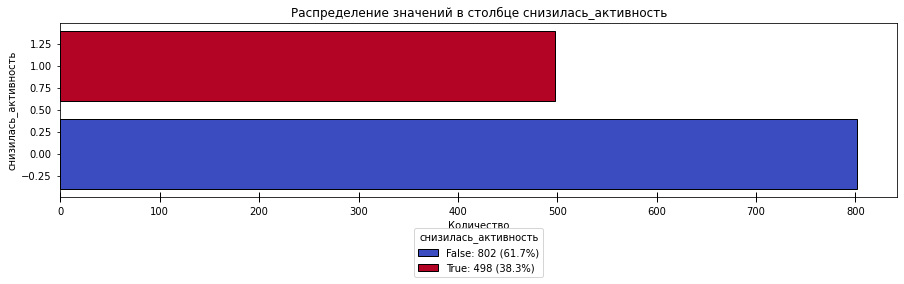

In [84]:
plot_bar(df_mf, 'снизилась_активность', 'coolwarm')

В 802 из 1300 записей пользовательская активность не снизилась, наблюдается дисбаланс классов

#### Исследуем столбец **премиум**.

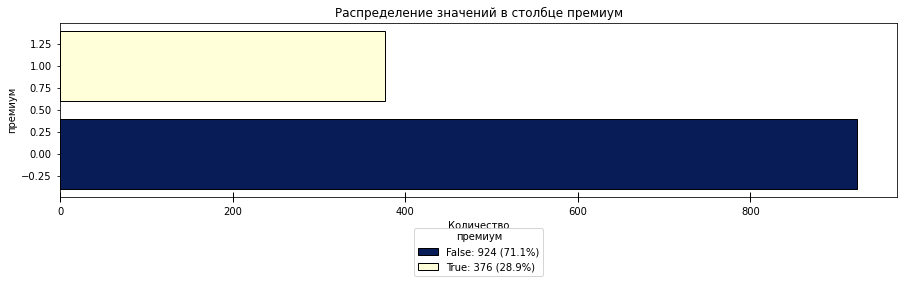

In [85]:
plot_bar(df_mf, 'премиум', 'YlGnBu_r')

только 376 из 1300 пользователей в таблице используют премиум, так же наблюдается дисбаланс классов

#### Исследуем столбец **разрешить_сообщать**.

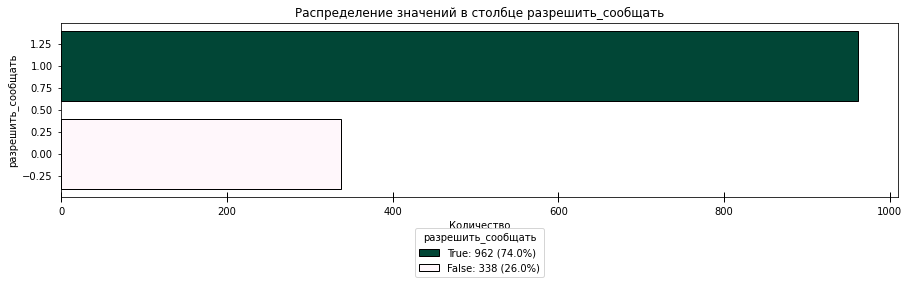

In [86]:
plot_bar(df_mf, 'разрешить_сообщать', 'PuBuGn_r')

только 962 из 1300 пользователей в таблице дали согласие на то, что им будут присылать дополнительные предложения о товаре. Также наблюдается дисбаланс классов.

#### Исследуем столбец **маркет_актив_6_мес**.

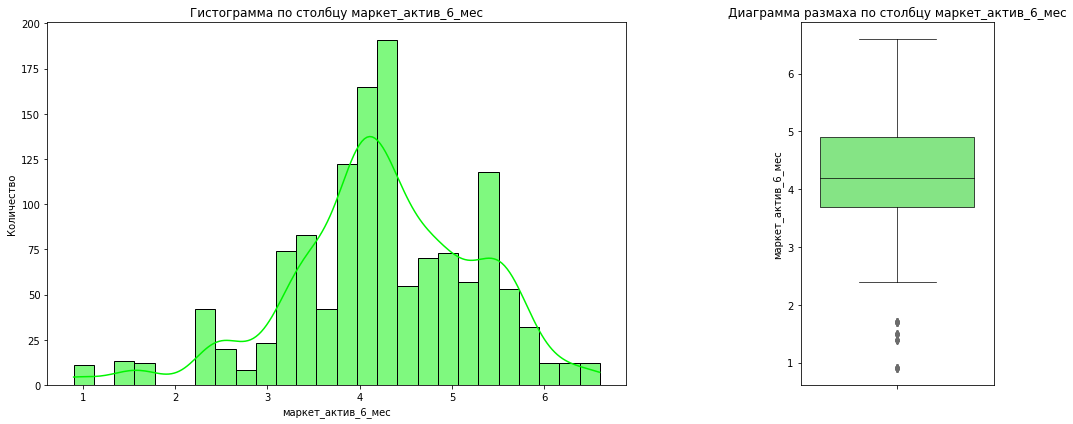

median		4.2
count    1300.000000
mean        4.253769
std         1.014814
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: маркет_актив_6_мес, dtype: float64


In [87]:
plot_and_describe(df_mf, 'маркет_актив_6_мес', '#00f500ff')

В данных есть выбросы ниже **2**, пик вокруг значения **4**, менее выраженый пик в районе **5.5**. Медианное значение переменной **маркет_актив_6_мес** составляет **4.2**, среднее примерно столько же.

#### Исследуем столбец **маркет_актив_тек_мес**.

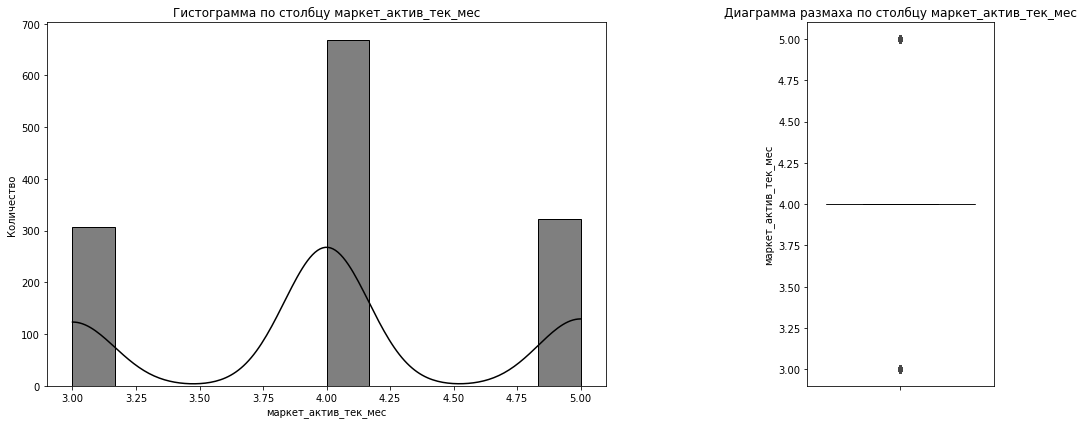

median		4.0
count    1300.000000
mean        4.011538
std         0.696868
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: маркет_актив_тек_мес, dtype: float64


In [88]:
plot_and_describe(df_mf, 'маркет_актив_тек_мес', '#000000')

Судя по графику, в столбце содержатся категориальные данные с тремя уникальными значениями. Изучим из на столбчатом графике.

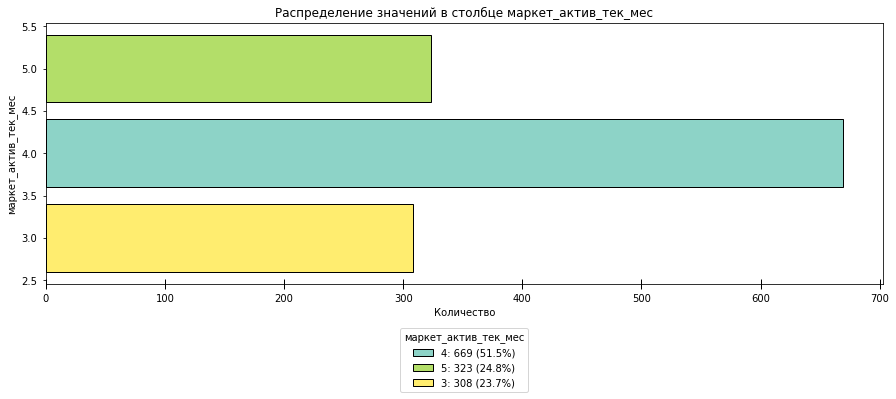

In [89]:
plot_bar(df_mf, 'маркет_актив_тек_мес', 'Set3')

Больше половины (*669* из *1300*) пользователей из таблицы имело **4** маркетинговых коммуникаций с компанией за текущий месяц, *323* и *308* имели по **5** и **3**  маркетинговых коммуникаций с компанией соответственно. Опять наблюдается дисбаланс классов.

#### Исследуем столбец **длительность**.

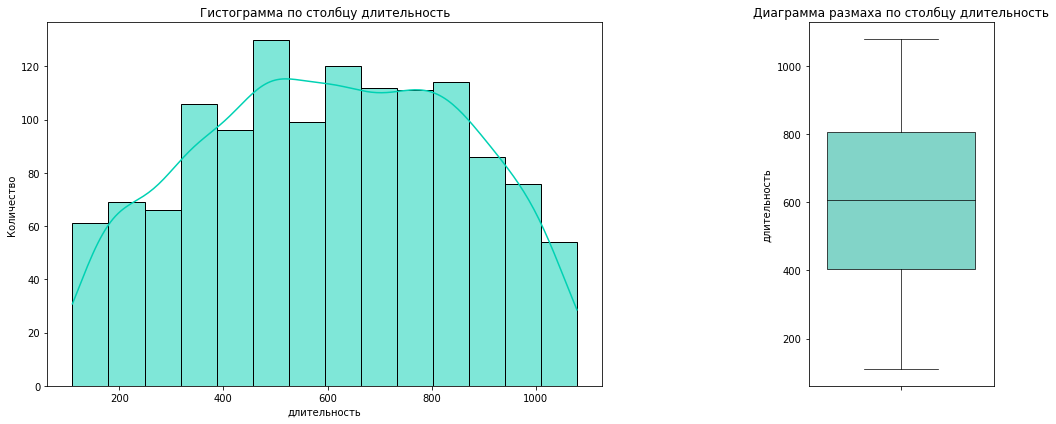

median		606.0
count    1300.000000
mean      601.898462
std       249.856289
min       110.000000
25%       405.500000
50%       606.000000
75%       806.000000
max      1079.000000
Name: длительность, dtype: float64


In [90]:
plot_and_describe(df_mf, 'длительность', '#00D1B3')

Пик графика в районе 400 дней с начала регистрации, медиана - 606 дней, среднее ~601 день.

#### Исследуем столбец **акционные_покупки**.

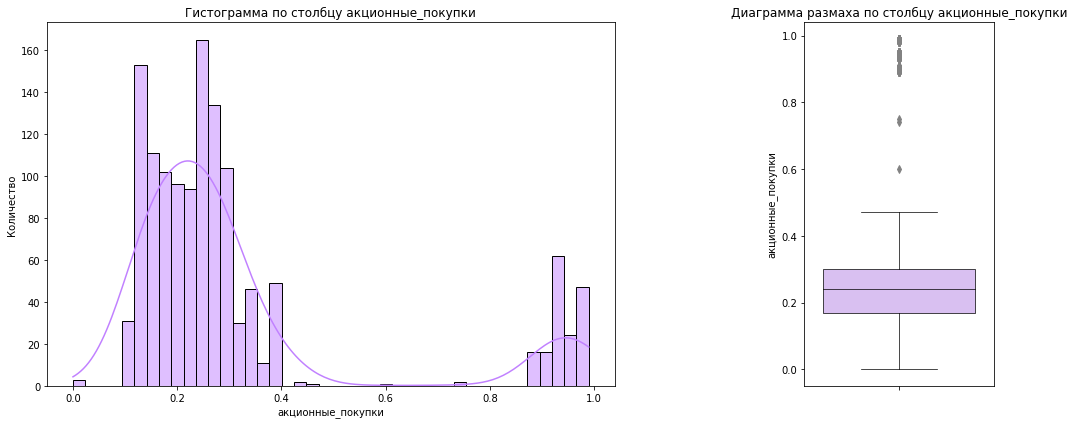

median		0.24
count    1300.000000
mean        0.319808
std         0.249843
min         0.000000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: акционные_покупки, dtype: float64


In [91]:
plot_and_describe(df_mf, 'акционные_покупки', '#C181FF')

In [92]:
print('Значений, больше 0.5 -',df_mf[df_mf['акционные_покупки'] > 0.5].shape[0])

Значений, больше 0.5 - 168


В столбце показано, какая доля от совершенных пользователем покупок за последние 6 месяцев была *акционной*.Большое количество (168) вбросов выше 0,5. Это неудивительно, некоторые пользователи чаще покупают акционные товары, чем не акционные. Медианное значение купленых акционных товаров - **24%**, среднее - **31%**.

#### Исследуем столбец **популярная_категория**.

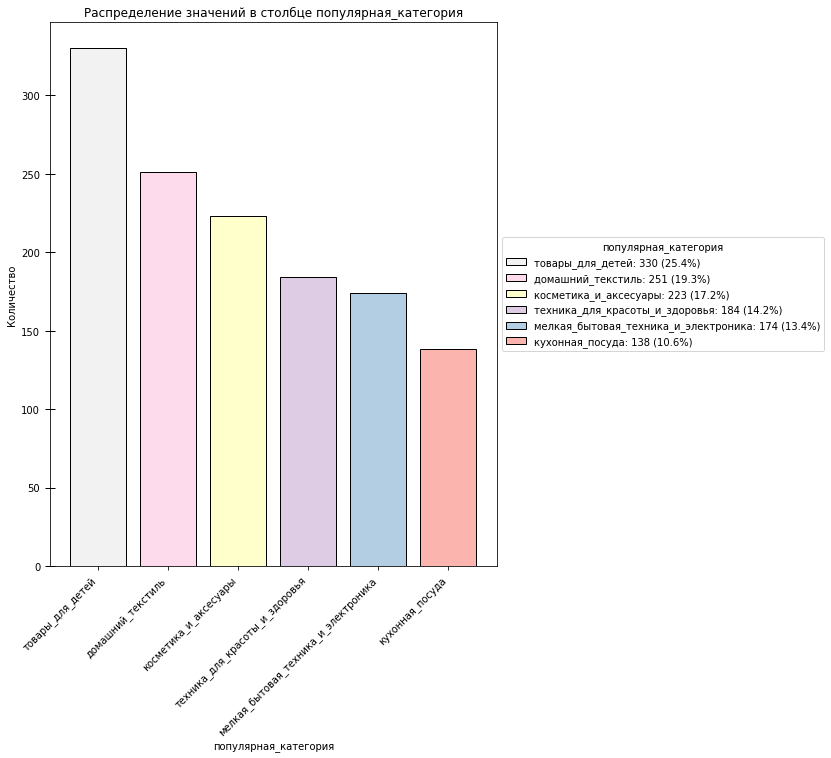

In [93]:
plot_bar(df_mf, 'популярная_категория', 'Pastel1_r')

У 330 из 1300 пользователей в таблице самая популярная категория товаров - **товары для детей**.  Опять наблюдается дисбаланс классов.

#### Исследуем столбец **средний_просмотр_категорий_за_визит**.

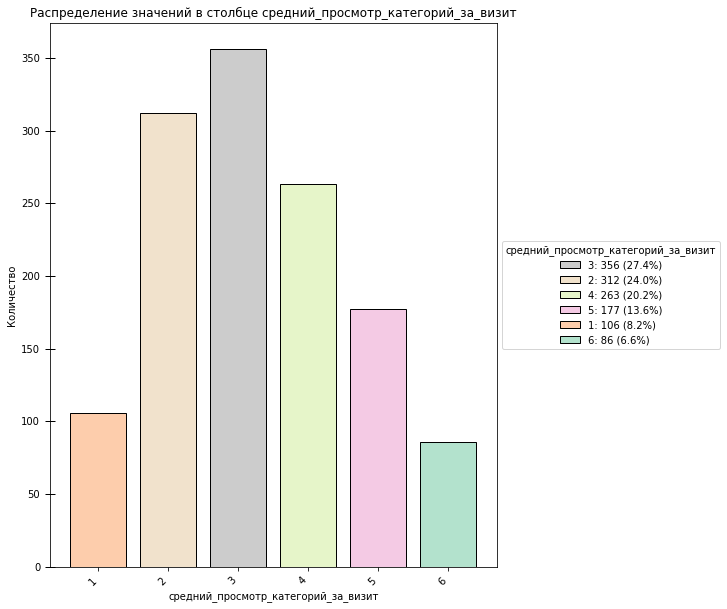

In [94]:
plot_bar(df_mf, 'средний_просмотр_категорий_за_визит', 'Pastel2_r')

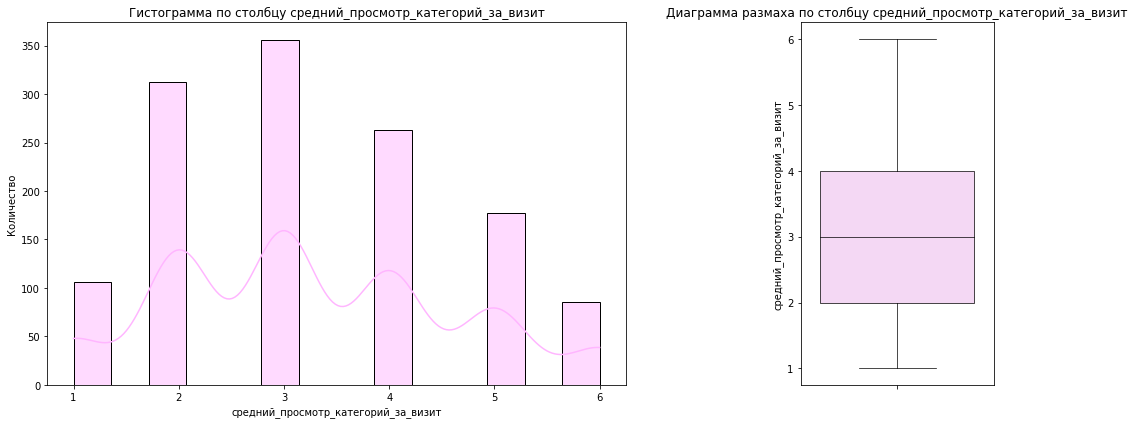

median		3.0
count    1300.00000
mean        3.27000
std         1.35535
min         1.00000
25%         2.00000
50%         3.00000
75%         4.00000
max         6.00000
Name: средний_просмотр_категорий_за_визит, dtype: float64


In [95]:
plot_and_describe(df_mf, 'средний_просмотр_категорий_за_визит', '#FFB6FF')

В среднем  покупатели за визит в течение последнего месяца просматривают *1-6* категорий.  ~**27.4%** пользователей в среднем просматривают **3** категории за визит. ~**24%**, ~**20.2%**, ~**13.6%**, ~**8.2%**, ~**6.6%** просматривали в среднем **2**, **4**, **5**, **1** и **6** категорий за визит соответственно. Медианное значение **3**, среднее **3.27**. 

#### Исследуем столбец **неоплаченные_продукты_штук_квартал**.

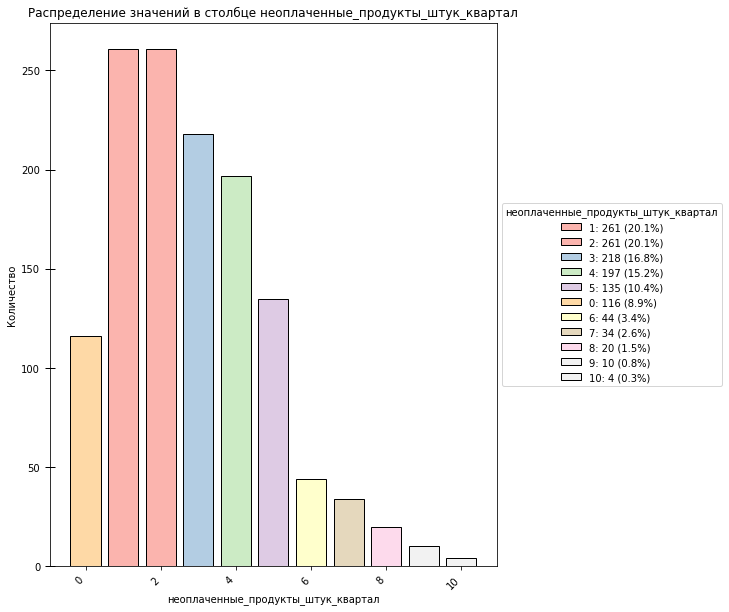

In [96]:
plot_bar(df_mf, 'неоплаченные_продукты_штук_квартал', 'Pastel1')

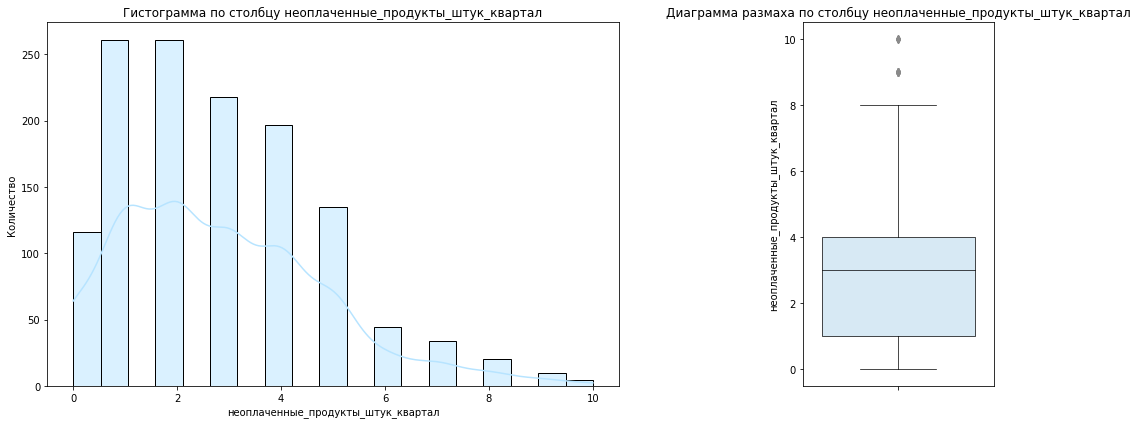

median		3.0
count    1300.000000
mean        2.840000
std         1.971451
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: неоплаченные_продукты_штук_квартал, dtype: float64


In [97]:
plot_and_describe(df_mf, 'неоплаченные_продукты_штук_квартал', '#B7E4FF')

Общее число неоплаченных товаров в корзине за последние 3 месяца у пользователей в таблице от **0** до **10**. Лидирует **1** и **2** товара, таких записей по **261** из **1300**, в сумме они составляют более **40%** записей. Медиана - **3** товара, среднее - **2.84**.

#### Исследуем столбец **ошибка_сервиса**.	

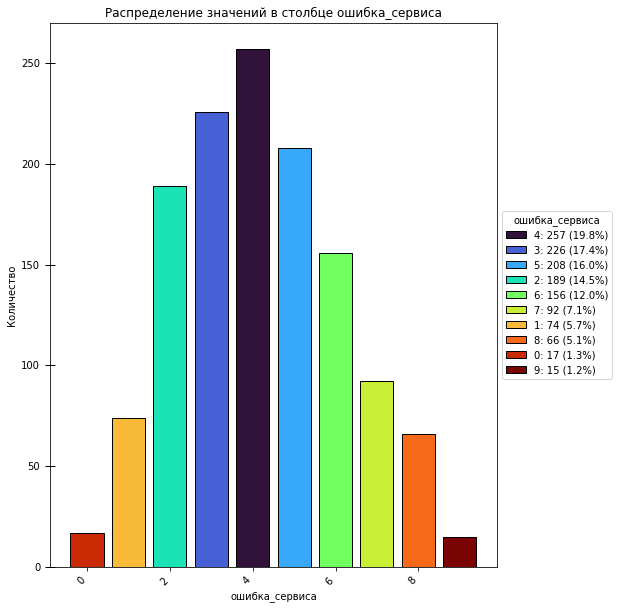

In [98]:
plot_bar(df_mf, 'ошибка_сервиса', 'turbo')

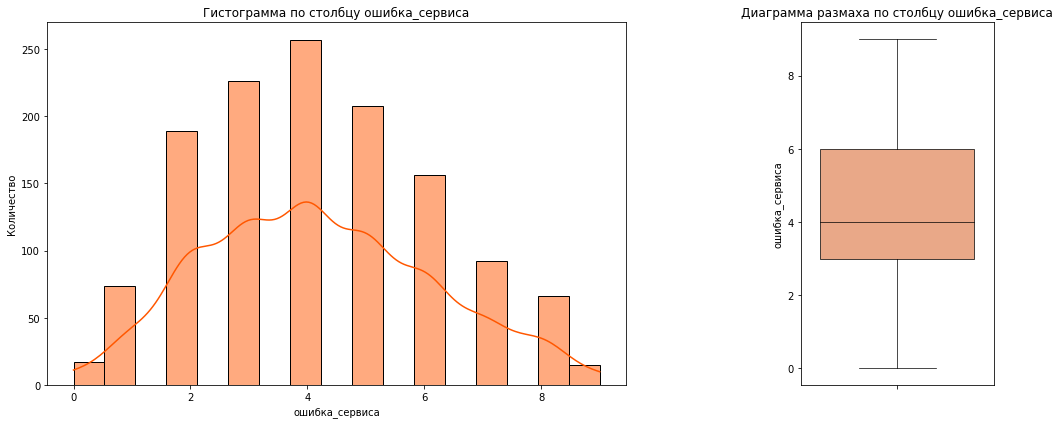

median		4.0
count    1300.000000
mean        4.185385
std         1.955298
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: ошибка_сервиса, dtype: float64


In [99]:
plot_and_describe(df_mf, 'ошибка_сервиса', '#FF5700')

Посетители сайта сталкиваются с **0 - 9** сбоями во время посещения сайта. Больше половины пользователей сталкиваются с **3 - 5** сбоями. Медиана - **4**, среднее ~ **4.18**.

#### Исследуем столбец **страниц_за_визит**.	

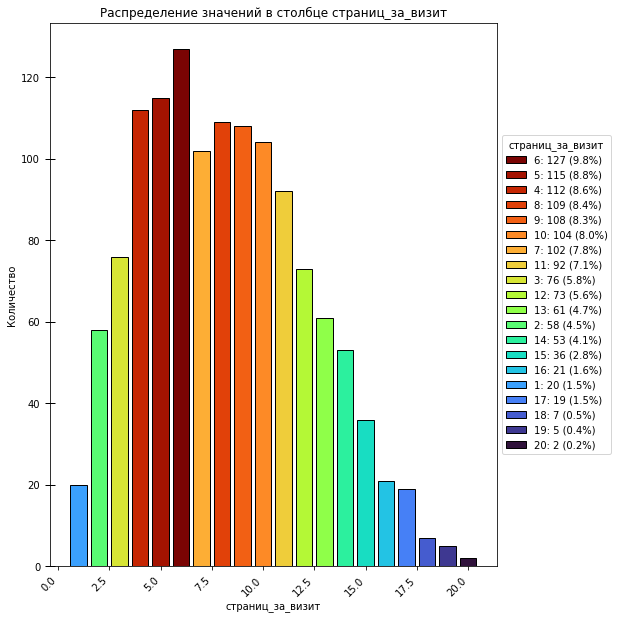

In [100]:
plot_bar(df_mf, 'страниц_за_визит', 'turbo_r')

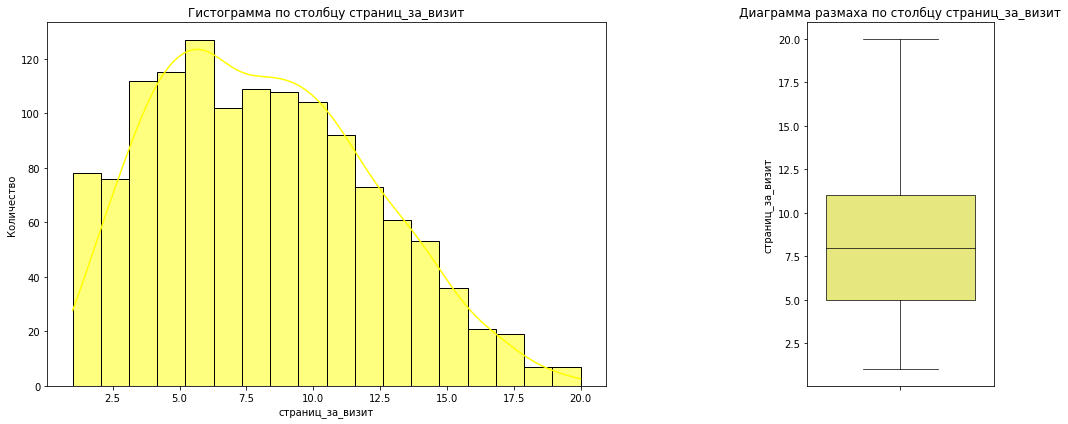

median		8.0
count    1300.000000
mean        8.176923
std         3.978126
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: страниц_за_визит, dtype: float64


In [101]:
plot_and_describe(df_mf, 'страниц_за_визит', 'yellow')

Cреднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние *3 месяца* находится в диапазоне **1 -20**. Более половины пользователей за последние *3 месяца* в среднем просматрмвают **4 - 10** страниц за визит. Медианное значение - **8**, среднее ~ **8.17**.

### Исследуем данные **df_mm**.

Удобнее будет исследовать данные за каждый из 3 периодов. Так как данные уже объединены с **df_fm**, используем записи из соответствующих столбцов **df_mf**.

#### Исследуем столбец **выручка_позапрошлый_месяц**.	

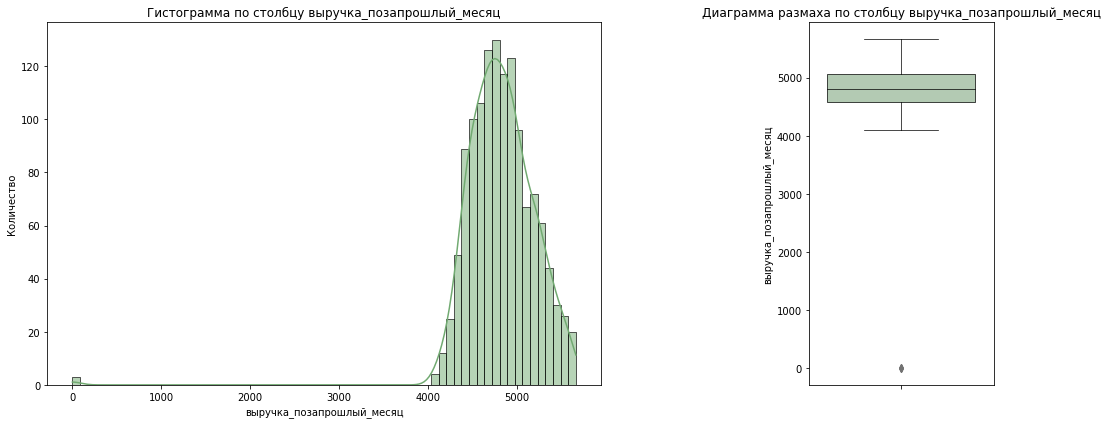

median		4809.0
count    1300.000000
mean     4825.206923
std       405.979663
min         0.000000
25%      4583.000000
50%      4809.000000
75%      5053.500000
max      5663.000000
Name: выручка_позапрошлый_месяц, dtype: float64


In [102]:
plot_and_describe(df_mf, 'выручка_позапрошлый_месяц', '#71AA71')

На графике вбросы в районе **0**. Это логично, в каждый из месяцев кто-то из активных пользователей ничего не покупает. 
Рассмотрим график без вбросов.

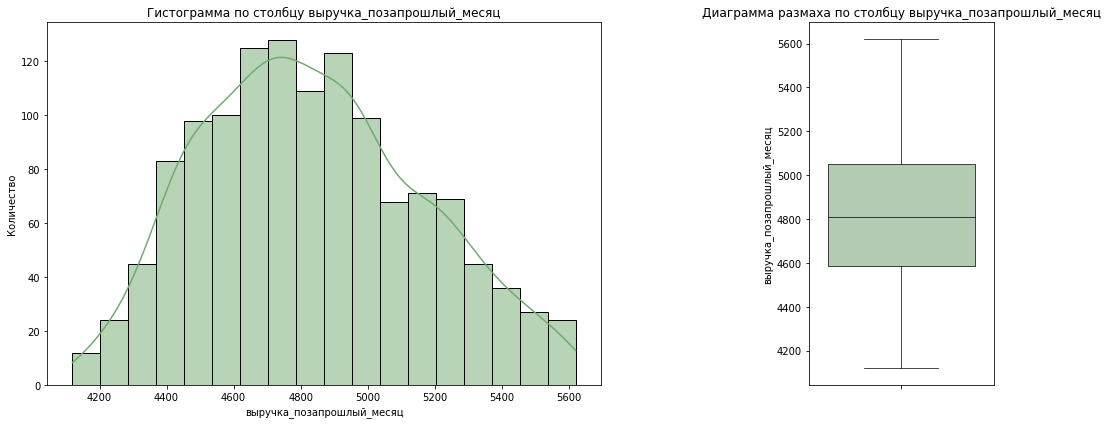

median		4809.0
count    1286.000000
mean     4834.271384
std       326.984218
min      4119.000000
25%      4586.250000
50%      4809.000000
75%      5051.000000
max      5621.000000
Name: выручка_позапрошлый_месяц, dtype: float64


In [103]:
plot_and_describe(df_mf, 'выручка_позапрошлый_месяц', '#71AA71', 1)

Не считая вбросов в районе 0.  Медианное значение суммы выручки по пользователям **4809**, среднее ~  **4834.27**.

#### Исследуем столбец **выручка_прошлый_месяц**.	

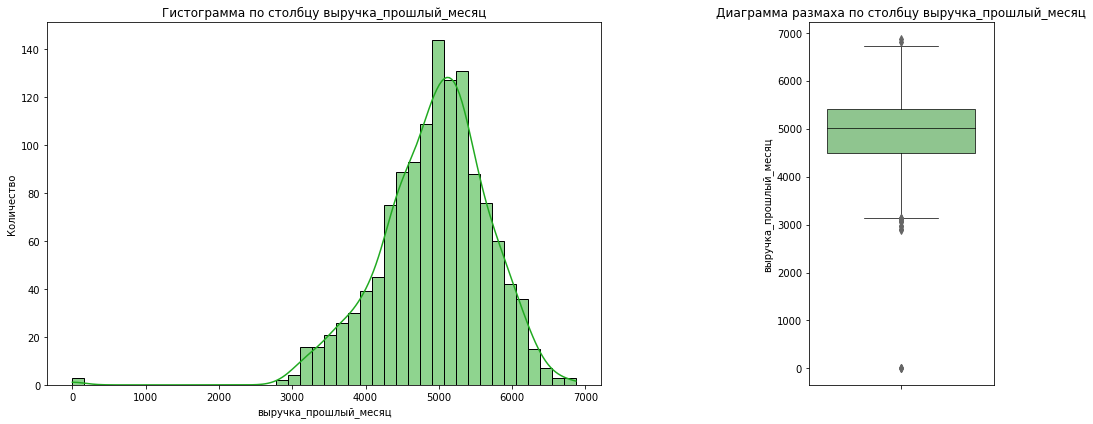

median		5005.0
count    1300.000000
mean     4936.920385
std       739.597997
min         0.000000
25%      4496.750000
50%      5005.000000
75%      5405.625000
max      6869.500000
Name: выручка_прошлый_месяц, dtype: float64


In [104]:
plot_and_describe(df_mf, 'выручка_прошлый_месяц', '#21AA21')

Опять ожидаемые вбросы на **0**. Рассмотрим графики без вбросов

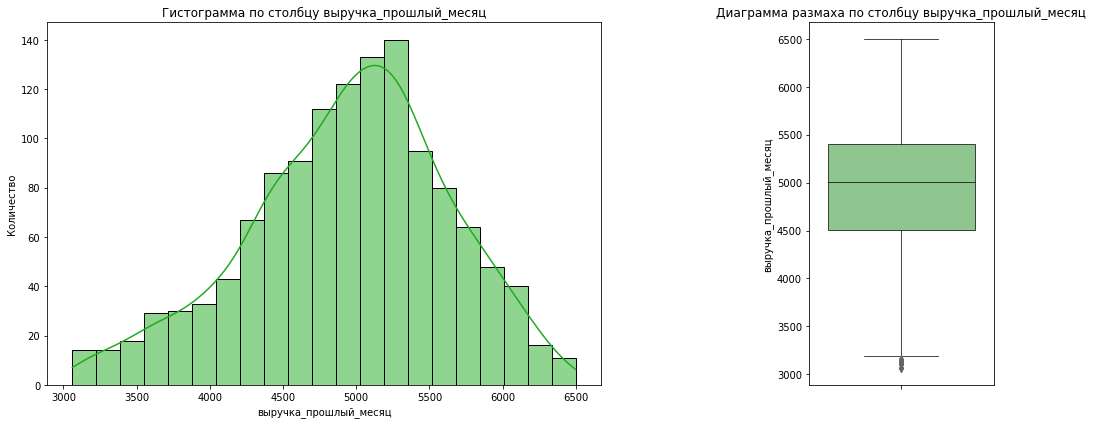

median		5005.0
count    1286.000000
mean     4945.171462
std       683.237357
min      3061.000000
25%      4502.000000
50%      5005.000000
75%      5399.500000
max      6499.000000
Name: выручка_прошлый_месяц, dtype: float64


In [105]:
plot_and_describe(df_mf, 'выручка_прошлый_месяц', '#21AA21',1)

Кроме вбрсов в районе **0** есть несколько вбросов рядом с нижней границей. Медианное значение суммы выручки по пользователям **5005**, среднее ~  **4945.17**.

#### Исследуем столбец **выручка_текущий_месяц**.	

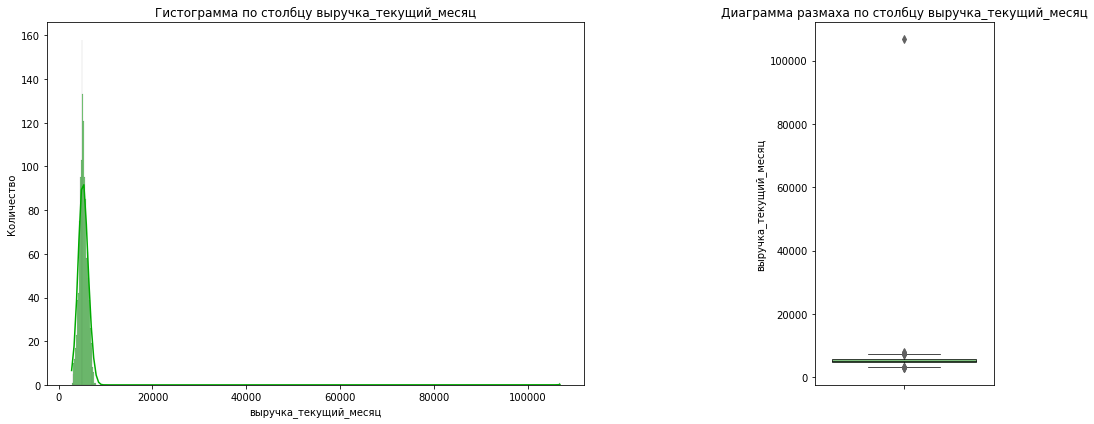

median		5179.950000000001
count      1300.000000
mean       5314.960846
std        2939.708156
min        2758.700000
25%        4706.050000
50%        5179.950000
75%        5761.725000
max      106862.200000
Name: выручка_текущий_месяц, dtype: float64


In [106]:
plot_and_describe(df_mf, 'выручка_текущий_месяц', '#00AA00')

Кроме ожидаемых вбросов на **0** наблюдаем вброс за значением **100000**. Шанс на то, что пользователь совершил в текущем месяце рекордную покупку очень низкий. Рассмотрим эту запись внимательнее.

In [107]:
display(df_mf[df_mf['выручка_текущий_месяц'] > 100000])

,снизилась_активность,премиум,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_позапрошлый_месяц,выручка_текущий_месяц,выручка_прошлый_месяц,минут_текущий_месяц,минут_прошлый_месяц
id,,,,,,,,,,,,,,,,,
215380,True,True,False,1.7,4,637,0.94,техника_для_красоты_и_здоровья,3,2,4,7,5051.0,106862.2,6077.0,14,12


Судя по тому, что у пользователь состоит в категории "снизилась_активность", огромная выручка за текущий месяц - это ошибка данных. 
Нам встретиалаь одна подобная запись из 1300 строк. Надежнее будет отбросить ее.

In [108]:
df_mf = df_mf[df_mf['выручка_текущий_месяц'] <= 100000]
dfinfo(df_mf)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1299 entries, 215348 to 216647
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   снизилась_активность                 1299 non-null   bool   
 1   премиум                              1299 non-null   bool   
 2   разрешить_сообщать                   1299 non-null   bool   
 3   маркет_актив_6_мес                   1299 non-null   float64
 4   маркет_актив_тек_мес                 1299 non-null   int64  
 5   длительность                         1299 non-null   int64  
 6   акционные_покупки                    1299 non-null   float64
 7   популярная_категория                 1299 non-null   object 
 8   средний_просмотр_категорий_за_визит  1299 non-null   int64  
 9   неоплаченные_продукты_штук_квартал   1299 non-null   int64  
 10  ошибка_сервиса                       1299 non-null   int64  
 11  страниц_за_визит       

None

,снизилась_активность,премиум,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_позапрошлый_месяц,выручка_текущий_месяц,выручка_прошлый_месяц,минут_текущий_месяц,минут_прошлый_месяц
id,,,,,,,,,,,,,,,,,
215348,True,True,True,3.4,5,121,0.00,товары_для_детей,6,2,1,5,0.0,3293.1,0.0,14,13
215349,True,True,True,4.4,4,819,0.75,товары_для_детей,4,4,2,5,4472.0,4971.6,5216.0,10,12
215350,True,False,False,4.9,3,539,0.14,домашний_текстиль,5,2,1,5,4826.0,5058.4,5457.5,13,8
215351,True,False,True,3.2,5,896,0.99,товары_для_детей,5,0,6,4,4793.0,6610.4,6158.0,13,11
215352,True,False,False,5.1,3,1064,0.94,товары_для_детей,3,2,3,2,4594.0,5872.5,5807.5,11,8


,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_позапрошлый_месяц,выручка_текущий_месяц,выручка_прошлый_месяц,минут_текущий_месяц,минут_прошлый_месяц
count,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000
mean,4.255735,4.011547,601.871440,0.319330,3.270208,2.840647,4.185527,8.177829,4825.033102,5236.787452,4936.042725,13.204003,13.468822
std,1.012725,0.697136,249.950617,0.249345,1.355852,1.972073,1.956044,3.979524,406.087624,835.474686,739.205300,4.222157,3.933332
min,0.900000,3.000000,110.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2758.700000,0.000000,4.000000,5.000000
25%,3.700000,4.000000,405.000000,0.170000,2.000000,1.000000,3.000000,5.000000,4583.000000,4705.500000,4496.500000,10.000000,11.000000
50%,4.200000,4.000000,606.000000,0.240000,3.000000,3.000000,4.000000,8.000000,4809.000000,5179.600000,5004.500000,13.000000,13.000000
75%,4.900000,4.000000,806.000000,0.300000,4.000000,4.000000,6.000000,11.000000,5054.000000,5759.950000,5404.250000,16.000000,17.000000
max,6.600000,5.000000,1079.000000,0.990000,6.000000,10.000000,9.000000,20.000000,5663.000000,7799.400000,6869.500000,23.000000,23.000000


В таблице ожидаемо осталось 1299 записей. Построим графики еще раз.

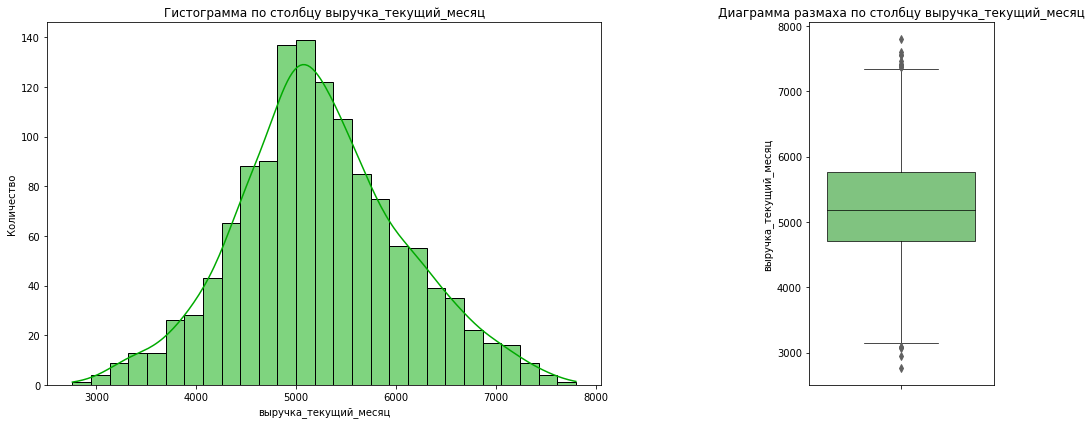

median		5179.6
count    1299.000000
mean     5236.787452
std       835.474686
min      2758.700000
25%      4705.500000
50%      5179.600000
75%      5759.950000
max      7799.400000
Name: выручка_текущий_месяц, dtype: float64


In [109]:
plot_and_describe(df_mf, 'выручка_текущий_месяц', '#00AA00')

### Исследуем данные **df_mt**.

Вбросов в районе 0 нет. Судя по всему, пользователей, не совершавших покупок в текущем месяце, в таблицу не включали. Есть несколько вбросов в районе ~**3000** и ~**7500**.  Медианная выручка с пользователя - **5179.6**, средняя ~ **5236.79**.

Как и с **df_mm**, удобнее будет исследовать данные за каждый из 2 периодов. Так же возьмем записи из соответствующих столбцов **df_mf**.

#### Исследуем столбец **минут_прошлый_месяц**.	

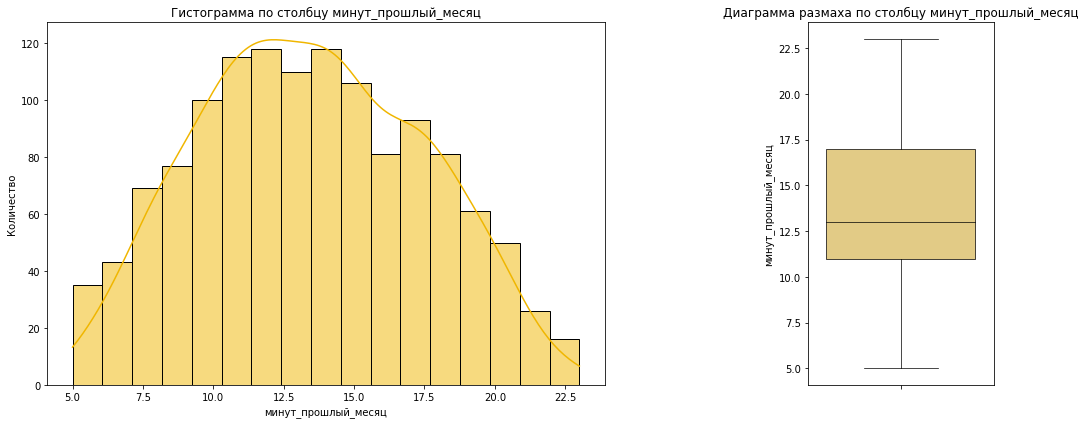

median		13.0
count    1299.000000
mean       13.468822
std         3.933332
min         5.000000
25%        11.000000
50%        13.000000
75%        17.000000
max        23.000000
Name: минут_прошлый_месяц, dtype: float64


In [110]:
plot_and_describe(df_mf, 'минут_прошлый_месяц', '#F0B600')

Медианное время, проведенное пользователями из таблицы на сайте в прошлом месяце - **13** минут, средне ~ **13.46** минут.

#### Исследуем столбец **минут_текущий_месяц**.	

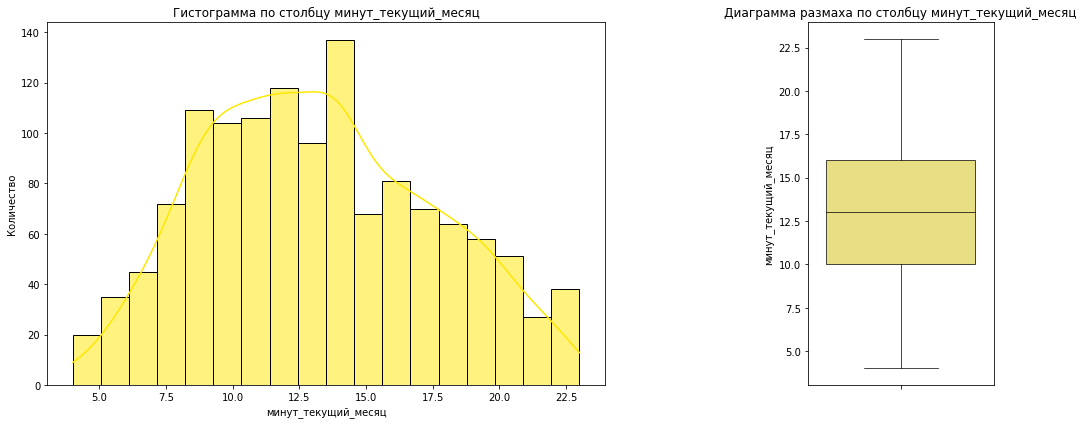

median		13.0
count    1299.000000
mean       13.204003
std         4.222157
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: минут_текущий_месяц, dtype: float64


In [111]:
plot_and_describe(df_mf, 'минут_текущий_месяц', '#FFE700')

Медианное время, проведенное пользователями из таблицы на сайте в текущем месяце - также **13** минут, среднее ~ **13.2** минуты.

### Исследуем данные **df_m**.

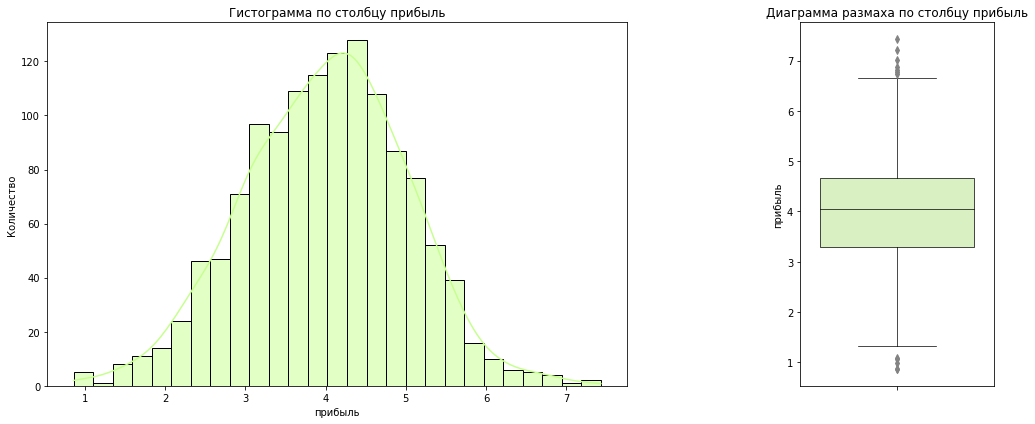

median		4.045
count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: прибыль, dtype: float64


In [112]:
plot_and_describe(df_m, 'прибыль', '#C7FF8F')

Вероятнее всего, прибыль считается в тысячах рублей. Есть несколько вбросов внизу в районе **1** и сверху в районе **7**.  Медианная среднемесячная прибыль с пользователей из таблицы на сайте за последние 3 месяца - **4.045**, средняя ~ **14**.

### Отберем клиентов с покупательской активностью не менее трёх месяцев.

В ТЗ нам указано отобрать клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период. В столбце **выручка_текущий_месяц** все записи больше **0**. Нужно создать новый датафрейм и включить туда все строки где и **выручка_позапрошлый_месяц** и **выручка_прошлый_месяц** больше 0.

In [113]:
#Создадим датафрейм с актуальными клиентами
df_actual = df_mf[(df_mf['выручка_позапрошлый_месяц'] > 0) & (df_mf['выручка_прошлый_месяц'] > 0)]
#Изучим его
dfinfo(df_actual)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 215349 to 216647
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   снизилась_активность                 1296 non-null   bool   
 1   премиум                              1296 non-null   bool   
 2   разрешить_сообщать                   1296 non-null   bool   
 3   маркет_актив_6_мес                   1296 non-null   float64
 4   маркет_актив_тек_мес                 1296 non-null   int64  
 5   длительность                         1296 non-null   int64  
 6   акционные_покупки                    1296 non-null   float64
 7   популярная_категория                 1296 non-null   object 
 8   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 9   неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 10  ошибка_сервиса                       1296 non-null   int64  
 11  страниц_за_визит       

None

,снизилась_активность,премиум,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_позапрошлый_месяц,выручка_текущий_месяц,выручка_прошлый_месяц,минут_текущий_месяц,минут_прошлый_месяц
id,,,,,,,,,,,,,,,,,
215349,True,True,True,4.4,4,819,0.75,товары_для_детей,4,4,2,5,4472.0,4971.6,5216.0,10,12
215350,True,False,False,4.9,3,539,0.14,домашний_текстиль,5,2,1,5,4826.0,5058.4,5457.5,13,8
215351,True,False,True,3.2,5,896,0.99,товары_для_детей,5,0,6,4,4793.0,6610.4,6158.0,13,11
215352,True,False,False,5.1,3,1064,0.94,товары_для_детей,3,2,3,2,4594.0,5872.5,5807.5,11,8
215353,True,False,True,3.3,4,762,0.26,домашний_текстиль,4,1,1,4,5124.0,5388.5,4738.5,10,10


,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_позапрошлый_месяц,выручка_текущий_месяц,выручка_прошлый_месяц,минут_текущий_месяц,минут_прошлый_месяц
count,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000
mean,4.256404,4.009259,602.967593,0.320069,3.267747,2.841821,4.184414,8.187500,4836.202160,5238.096065,4947.468750,13.210648,13.470679
std,1.013525,0.696316,249.195823,0.249159,1.355125,1.974074,1.951719,3.978459,333.514091,834.318717,700.797239,4.221794,3.937630
min,0.900000,3.000000,121.000000,0.110000,1.000000,0.000000,0.000000,1.000000,4098.000000,2758.700000,2890.000000,4.000000,5.000000
25%,3.700000,4.000000,409.500000,0.170000,2.000000,1.000000,3.000000,5.000000,4584.500000,4706.050000,4498.125000,10.000000,10.750000
50%,4.200000,4.000000,606.500000,0.240000,3.000000,3.000000,4.000000,8.000000,4810.500000,5179.950000,5005.500000,13.000000,13.000000
75%,4.900000,4.000000,806.250000,0.300000,4.000000,4.000000,6.000000,11.000000,5056.000000,5759.275000,5405.625000,16.000000,17.000000
max,6.600000,5.000000,1079.000000,0.990000,6.000000,10.000000,9.000000,20.000000,5663.000000,7799.400000,6869.500000,23.000000,23.000000


Отбросили еще 3 записи. Минимальные значения столбцов **выручка_позапрошлый_месяц**, **выручка_прошлый_месяц** и **выручка_текущий_месяц** больше 0.

### Выводы.

Был проведен исследовательский анализ предоставленых данных. 
Для числовых данных были использованы гистограммы и диаграммы размаха, что позволило выявить медианы и разбросы значений.
Для категориальных данных использовались столбчатые диаграммы, что позволило визуализировать распределение уникальных значений.

Было выявлено следующее:
В датафрейме **df_mf**:

- Исследование столбца **снизилась_активность** показало, что в **802** из **1300** записей активность не снизилась, что указывает на дисбаланс классов.
- Исследование столбца **премиум** показало, что только **376** из **1300** пользователей используют премиум, что также указывает на дисбаланс классов.
- В столбце **разрешить_сообщать** **962** из **1300** пользователей дали согласие на получение дополнительных предложений, что также демонстрирует дисбаланс классов.
- Исследование столбца **маркет_актив_6_мес** показало, что медиана составляет **4.2**.
- Анализ столбца **маркет_актив_тек_мес** выявил три уникальных значения с медианой **4.0**, что указывает на наличие категориальных данных.
- В столбце **длительность** медиана **606** дней.
- В столбце **акционные_покупки** медиана составляет **24%**, большое количеством выбросов выше **0.5**.
- В столбце **популярная_категория** у **330** из **1300** пользователей самая популярная категория - **товары для детей**, что указывает на дисбаланс классов.
- В столбце **средний_просмотр_категорий_за_визит** медиана составляет **3**.
- В столбце **неоплаченные_продукты_штук_квартал** медиана составляет **3**, а распределение варьируется от **0** до **10**.
- В столбце **ошибка_сервиса** медиана составляет **4**.
- В столбце **страниц_за_визит** медиана составляет **8**, распределение варьируется от **1** до **20**.

В датафрейме **df_mm**:
- **выручка_позапрошлый_месяц**: Медианное значение составляет **4809** рублей. Есть выбросы на уровне **0** рублей, что логично, так как в каждый из месяцев кто-то из активных пользователей ничего не покупает .
- **выручка_прошлый_месяц**: Медианное значение составляет **5005** рублей. Опять же, наблюдаются выбросы на уровне **0** рублей .
- **выручка_текущий_месяц**: Медианное значение составляет 5179.95 рублей. Был обнаружен вброс в районе  **100000** рублей. Строка с ним была отброшена.

В датафрейме **df_mt**:

- **минуты_прошлый_месяц**: Медианное значение составляет **13** минут. Среднее значение около **13.46** минут .
- **минуты_текущий_месяц**: Медианное значение также составляет **13** минут. Среднее значение около **13.2** минут .

В датафрейме **df_m**:

- **прибыль**: Медианное значение составляет **4.045** тысяч рублей. Есть несколько выбросов внизу (около **1** тысячи рублей) и вверху (около **7** тысяч рублей).

Также отфильтровали клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период в датафрейм **df_actual** Туда попало **1296** из **1300**, которые были изначально.

Дисбаланс классов в столбцах  **снизилась_активность**, **премиум**, **разрешить_сообщать**, и **популярная_категория**, может привести к тому, что модель будет предсказывать чаще класс с большим количеством примеров, что снизит её точность для классов с меньшим количеством данных. Во время подготовки данных для обучения важно будет использовать стратификацию.

## Корреляционный анализ.

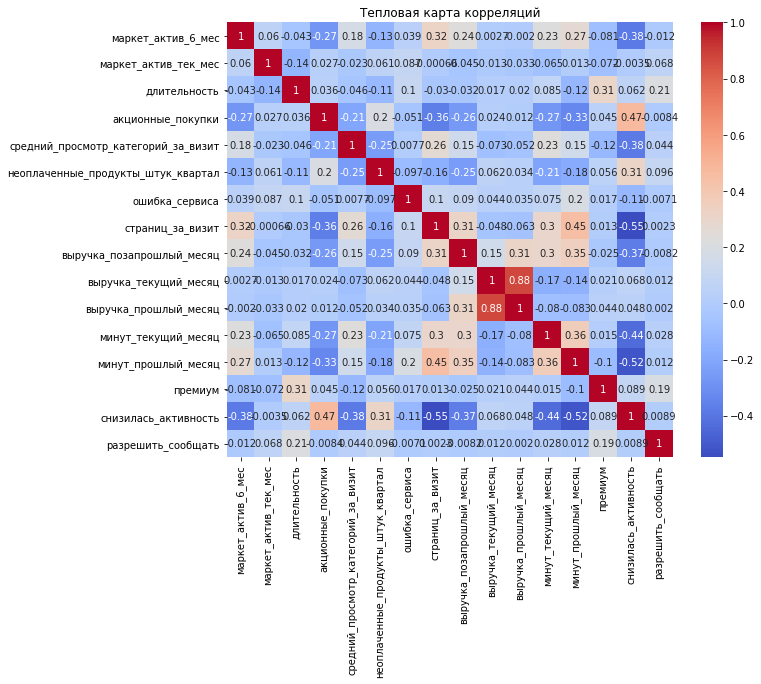

Корреляция между столбцом "маркет_актив_6_мес" и  столбцом "страниц_за_визит": 0.32
Корреляция между столбцом "маркет_актив_6_мес" и  столбцом "снизилась_активность": -0.38
Корреляция между столбцом "длительность" и  столбцом "премиум": 0.31
Корреляция между столбцом "акционные_покупки" и  столбцом "страниц_за_визит": -0.36
Корреляция между столбцом "акционные_покупки" и  столбцом "минут_прошлый_месяц": -0.33
Корреляция между столбцом "акционные_покупки" и  столбцом "снизилась_активность": 0.47
Корреляция между столбцом "средний_просмотр_категорий_за_визит" и  столбцом "снизилась_активность": -0.38
Корреляция между столбцом "неоплаченные_продукты_штук_квартал" и  столбцом "снизилась_активность": 0.31
Корреляция между столбцом "страниц_за_визит" и  столбцом "выручка_позапрошлый_месяц": 0.31
Корреляция между столбцом "страниц_за_визит" и  столбцом "минут_прошлый_месяц": 0.45
Корреляция между столбцом "страниц_за_визит" и  столбцом "снизилась_активность": -0.55
Корреляция между столбцом "

In [114]:
# Расчитаем корреляцию между всеми количественными признаками
numeric_df = df_mf.select_dtypes(include=[np.number]).copy()

# Добавим булевые столбцы как целочисленные в numeric_df
numeric_df['премиум'] = df_actual['премиум'].astype(int)
numeric_df['снизилась_активность'] = df_actual['снизилась_активность'].astype(int)
numeric_df['разрешить_сообщать'] = df_actual['разрешить_сообщать'].astype(int)

# Вычисляем матрицу корреляций
corr_matrix = numeric_df.corr(method='spearman')

# Строим тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Тепловая карта корреляций')
plt.show()

# Выводим значения корреляций для всех пар числовых столбцов, где корреляция выше 0.3
for i, column1 in enumerate(corr_matrix.columns):
    for j, column2 in enumerate(corr_matrix.columns):
        if i < j and abs(corr_matrix[column1][column2]) > 0.3:
            print(f'Корреляция между столбцом "{column1}" и  столбцом "{column2}": {corr_matrix[column1][column2]:.2f}')

Корреляция между столбцом **выручка_текущий_месяц** и  столбцом **выручка_прошлый_месяц**: 0.88, это может привести к мультиколлинеарности, при обучении модели будем использовать только столбец **выручка_текущий_месяц**.

In [115]:
# Удалим столбец "выручка_прошлый_месяц"
pd.options.mode.chained_assignment = None
df_actual.drop(columns=['выручка_прошлый_месяц'], inplace=True)

In [116]:
df_actual.head()

,снизилась_активность,премиум,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_позапрошлый_месяц,выручка_текущий_месяц,минут_текущий_месяц,минут_прошлый_месяц
id,,,,,,,,,,,,,,,,
215349,True,True,True,4.4,4,819,0.75,товары_для_детей,4,4,2,5,4472.0,4971.6,10,12
215350,True,False,False,4.9,3,539,0.14,домашний_текстиль,5,2,1,5,4826.0,5058.4,13,8
215351,True,False,True,3.2,5,896,0.99,товары_для_детей,5,0,6,4,4793.0,6610.4,13,11
215352,True,False,False,5.1,3,1064,0.94,товары_для_детей,3,2,3,2,4594.0,5872.5,11,8
215353,True,False,True,3.3,4,762,0.26,домашний_текстиль,4,1,1,4,5124.0,5388.5,10,10


##  Использование пайплайнов.

Создадим пайплайн, который подготовит данные, обучит 4 модели - **KNeighborsClassifier()**, **DecisionTreeClassifier()**, **LogisticRegression()** и  **SVC()**, подберет для них на основе скоринга лучшие гиперпараметры и выберет лучшую модель. 
Для скоринга  выберем метрику **ROC-AUC**, так как она устойчива к несбалансированным данным и легко интерпретируется (чем ближе к 1 - тем лучше).

### Подготовим выборки.

Разделим данные на обучающую и тестовую выборки, чтобы в дальнейшем оценить качество модели на данных, не участвовавших в обучении.

In [117]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = df_actual.drop('снизилась_активность', axis=1)
y = df_actual['снизилась_активность']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y)


### Подготовим данные.

Создадим пайплайн для обработки количественных и категориальных признаков. Для номинальных категориальных признаков применим OneHotEncoder, для ранговых - OrdinalEncoder. Для количественных признаков применим StandardScaler и MinMaxScaler.

In [118]:
# Категориальные признаки
nominal_categorical_features = ['популярная_категория']
ordinal_categorical_features = ['премиум', 'разрешить_сообщать']

# Количественные признаки
numerical_features = [
    'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
    'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал',
    'ошибка_сервиса', 'страниц_за_визит', 'выручка_позапрошлый_месяц', 'выручка_текущий_месяц',
    'минут_текущий_месяц', 'минут_прошлый_месяц'
]


In [119]:
# Кастыль для OHE
X_train[nominal_categorical_features] = X_train[nominal_categorical_features].apply(lambda x: x.astype('category'))
X_test[nominal_categorical_features] = X_test[nominal_categorical_features].apply(lambda x: x.astype('category'))

for col in nominal_categorical_features:
    X_train[col].cat.add_categories('unknown', inplace=True)
    X_test[col].cat.add_categories('unknown', inplace=True)

# Теперь заменим NaN на 'unknown'
X_train[nominal_categorical_features] = X_train[nominal_categorical_features].fillna('unknown')
X_test[nominal_categorical_features] = X_test[nominal_categorical_features].fillna('unknown')


In [120]:
# Преобразование булевых столбцов в категориальные (тип object)
bool_features = X_train.select_dtypes(include=['bool']).columns
X_train[bool_features] = X_train[bool_features].astype('object')
X_test[bool_features] = X_test[bool_features].astype('object')

# Пайплайн для категориальных признаков с OneHotEncoder
categorical_transformer_ohe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='error', drop='first'))
])

# Пайплайн для категориальных признаков с OrdinalEncoder
categorical_transformer_ord = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Пайплайн для количественных признаков со StandardScaler
numerical_transformer_std = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Пайплайн для количественных признаков с MinMaxScaler
numerical_transformer_mm = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

# Объединение всех преобразований в ColumnTransformer с StandardScaler
preprocessor_std = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_std, numerical_features),
        ('cat_ohe', categorical_transformer_ohe, nominal_categorical_features),
        ('cat_ord', categorical_transformer_ord, ordinal_categorical_features)
    ]
)

# Объединение всех преобразований в ColumnTransformer с MinMaxScaler
preprocessor_mm = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_mm, numerical_features),
        ('cat_ohe', categorical_transformer_ohe, nominal_categorical_features),
        ('cat_ord', categorical_transformer_ord, ordinal_categorical_features)
    ]
)


### Обучим модели.

Создадим пайплайн для подготовки данных и обучения моделей.

In [121]:
# Список моделей для обучения
models = [
    ('knn', KNeighborsClassifier()),
    ('tree', DecisionTreeClassifier(random_state=RANDOM_STATE)),
    ('logreg', LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', max_iter=10000)),
    ('svc', SVC(random_state=RANDOM_STATE, probability=True))
]

# Пайплайн для подготовки данных и модели
pipeline_std = Pipeline(steps=[('preprocessor', preprocessor_std), ('model', KNeighborsClassifier())])
pipeline_mm = Pipeline(steps=[('preprocessor', preprocessor_mm), ('model', KNeighborsClassifier())])

# Параметры для поиска гиперпараметров
param_grid = [
    {
        'model': [KNeighborsClassifier()],
        'model__n_neighbors': range(1, 10),
        'preprocessor': [preprocessor_std, preprocessor_mm]
    },
    {
        'model': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'model__max_depth': range(2, 10),
        'preprocessor': [preprocessor_std, preprocessor_mm]
    },
    {
        'model': [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', max_iter=10000)],
        'model__C': np.logspace(-4, 4, 100), 
        'model__penalty': ['l1', 'l2'],
        'model__class_weight': [None, 'balanced'],
        'preprocessor': [preprocessor_std, preprocessor_mm]
    },
    {
        'model': [SVC(random_state=RANDOM_STATE, probability=True)],
        'model__C': np.logspace(-2, 2, 3), 
        'model__gamma': np.logspace(-2, 2, 3),
        'preprocessor': [preprocessor_std, preprocessor_mm]
    }
]


Используем RandomizedSearchCV для подбора гиперпараметров и выбора лучшей модели.

In [122]:


# Поиск лучших параметров с уменьшенным количеством итераций для SVC
search = RandomizedSearchCV(pipeline_std, param_grid, n_iter=30, cv=5, scoring='roc_auc', random_state=RANDOM_STATE, n_jobs=-1)
search.fit(X_train, y_train)

# Лучшая модель и ее параметры
best_model = search.best_estimator_
print('Лучшая модель:\n', best_model)
print('ROC-AUC на обучающей выборке:', search.best_score_)

# Оценка на тестовой выборке
y_pred = best_model.predict_proba(X_test)[:, 1]
print('ROC-AUC на тестовой выборке:', roc_auc_score(y_test, y_pred))


Лучшая модель:
 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['маркет_актив_6_мес',
                                                   'маркет_актив_тек_мес',
                                                   'длительность',
                                                   'акционные_покупки',
                                                   'средний_просмотр_категорий_за_визит',
                                                   'неоплаченные_продукты_штук_квартал',
                                                   'ошибка_сервиса',
                               

### Выводы.

-  В качестве метрики оценки модели использовалась площадь под кривой ошибок (**ROC-AUC**). Данная метрика была выбрана, так как она устойчива к несбалансированным данным и легко интерпретируется. Значение **ROC-AUC** может варьироваться от 0 до 1, где 1 указывает на идеальную модель, а 0.5 указывает на модель, которая работает не лучше случайного угадывания.
-  В результате работы пайплайна, лучшей моделью оределена **логистическая регрессия**, данные для которой были сбалансированы с помощью **StandardScaler()**. **ROC-AUC** на обучающей выборке: **0.8991526096344279**, на тестовой выборке: **0.9177284310156535**.

## Анализ важности признаков

Для анализа важности признаков мы будем использовать метод SHAP (SHapley Additive exPlanations), который позволяет объяснить выход модели для любого набора данных.

### Оценка важности признаков и построение графика.

 Cоздадим график важности признаков для лучшей модели.

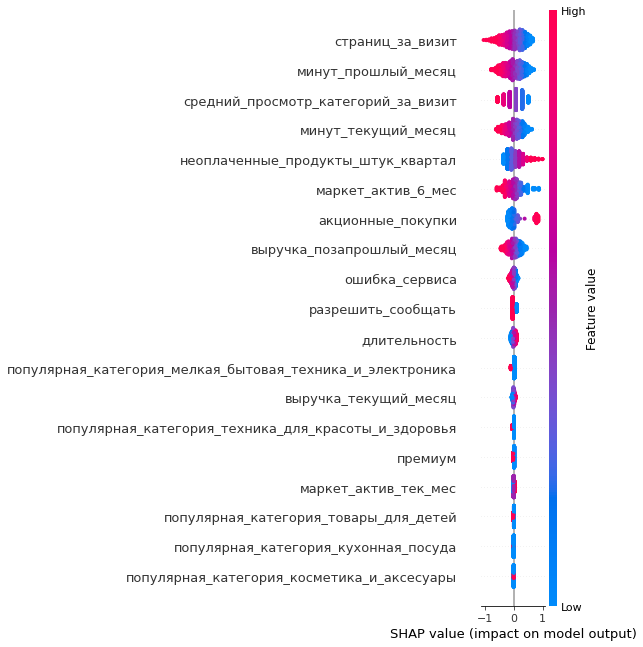

In [123]:
# Создадим объект Explainer для лучшей модели
explainer = shap.Explainer(best_model.named_steps['model'], best_model.named_steps['preprocessor'].transform(X_train))

# Рассчитаем значения SHAP для обучающей выборки
shap_values = explainer(best_model.named_steps['preprocessor'].transform(X_train))

# Получим имена всех признаков после преобразований вручную
preprocessor = best_model.named_steps['preprocessor']

# Получим имена числовых признаков после StandardScaler или MinMaxScaler
num_features_std = preprocessor.transformers_[0][2]

# Получим имена категориальных признаков после OneHotEncoder
cat_features_ohe = preprocessor.transformers_[1][1].named_steps['encoder'].get_feature_names(nominal_categorical_features)

# Получим имена категориальных признаков после OrdinalEncoder
cat_features_ord = preprocessor.transformers_[2][2]

# Объединим все признаки в один список
feature_names = list(num_features_std) + list(cat_features_ohe) + list(cat_features_ord)


# Построим график важности признаков
shap.summary_plot(shap_values, features=best_model.named_steps['preprocessor'].transform(X_train), feature_names=feature_names)

# Покажем график
plt.show()

### Выводы.

-  Наименее значимые признаки для модели расположенны ближе к нижней части графика, имеют меньшее влияние на модель. Среди них можно выделить **ошибка_сервиса** и **длительность**. Эти признаки имеют малое значение и могут быть исключены из модели без значительной потери точности.
-  Признаки, наиболее сильно влияющие на целевой признак: **страниц_за_визит** и **минут_прошлый_месяц** имеют наибольшую значимость. Эти признаки оказывают значительное влияние на модель и требуют особого внимания при анализе и интерпретации результатов.
-  Также важны такие признаки как **средний_просмотр_категорий_за_визит** и **неоплаченные_продукты_штук_квартал**.

## Сегментация покупателей.

Для выполнения сегментации покупателей мы используем результаты моделирования и данные о прибыльности покупателей.

### Выполним сегментацию покупателей.

Для начала создадим столбец **выручка_средняя**, в котором будет средняя выручка за текущий и позапрошлый месяца. На основе него разделим пользователей на три сегмента - **высокая**, **средняя** и **низкая** прибыльность.

In [124]:

# Добавим столбец "выручка_средняя"
df_actual['выручка_средняя'] = df_actual[['выручка_текущий_месяц', 'выручка_позапрошлый_месяц']].mean(axis=1)

# Разделим пользователей на три сегмента по средней выручке
df_actual['прибыльность'] = pd.qcut(df_actual['выручка_средняя'], q=3, labels=['низкая', 'средняя', 'высокая'])

df_actual.head()

,снизилась_активность,премиум,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_позапрошлый_месяц,выручка_текущий_месяц,минут_текущий_месяц,минут_прошлый_месяц,выручка_средняя,прибыльность
id,,,,,,,,,,,,,,,,,,
215349,True,True,True,4.4,4,819,0.75,товары_для_детей,4,4,2,5,4472.0,4971.6,10,12,4721.80,низкая
215350,True,False,False,4.9,3,539,0.14,домашний_текстиль,5,2,1,5,4826.0,5058.4,13,8,4942.20,средняя
215351,True,False,True,3.2,5,896,0.99,товары_для_детей,5,0,6,4,4793.0,6610.4,13,11,5701.70,высокая
215352,True,False,False,5.1,3,1064,0.94,товары_для_детей,3,2,3,2,4594.0,5872.5,11,8,5233.25,средняя
215353,True,False,True,3.3,4,762,0.26,домашний_текстиль,4,1,1,4,5124.0,5388.5,10,10,5256.25,высокая


В результате анализа важности признаков используемой нами модели нам известно, что наиболее значимым признаком является **страниц_за_визит**. 

In [125]:
# Разделим пользователей на три сегмента по количеству посещаемых страниц за визит
df_actual['посещает_страниц'] = pd.qcut(df_actual['страниц_за_визит'], q=3, labels=['мало', 'средне', 'много'])

# Вывод первых 5 строк для проверки
df_actual.head()

,снизилась_активность,премиум,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_позапрошлый_месяц,выручка_текущий_месяц,минут_текущий_месяц,минут_прошлый_месяц,выручка_средняя,прибыльность,посещает_страниц
id,,,,,,,,,,,,,,,,,,,
215349,True,True,True,4.4,4,819,0.75,товары_для_детей,4,4,2,5,4472.0,4971.6,10,12,4721.80,низкая,мало
215350,True,False,False,4.9,3,539,0.14,домашний_текстиль,5,2,1,5,4826.0,5058.4,13,8,4942.20,средняя,мало
215351,True,False,True,3.2,5,896,0.99,товары_для_детей,5,0,6,4,4793.0,6610.4,13,11,5701.70,высокая,мало
215352,True,False,False,5.1,3,1064,0.94,товары_для_детей,3,2,3,2,4594.0,5872.5,11,8,5233.25,средняя,мало
215353,True,False,True,3.3,4,762,0.26,домашний_текстиль,4,1,1,4,5124.0,5388.5,10,10,5256.25,высокая,мало


Итого у нас 9 групп покупателей - покупатели с **низкой**, **средней** и  **высокой** прибыльностью, посещающие **мало**, **средне** или **много** страниц. Далее будем изучать покупателей с **высокой** прибыльностью, посещающих **мало** страниц, так как снижение активности этих пользователей может существенно сократить прибыль компании.

### Изучим покупателей с высокой прибыльностью, посещающих мало страниц.

In [126]:
# Создадим DataFrame с покупателями, у которых высокая прибыльность и мало страниц за визит
df_segment = df_actual[(df_actual['прибыльность'] == 'высокая') & (df_actual['посещает_страниц'] == 'мало')]

# Вывод первых 5 строк для проверки
dfinfo(df_segment)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 215351 to 216636
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   снизилась_активность                 166 non-null    bool    
 1   премиум                              166 non-null    bool    
 2   разрешить_сообщать                   166 non-null    bool    
 3   маркет_актив_6_мес                   166 non-null    float64 
 4   маркет_актив_тек_мес                 166 non-null    int64   
 5   длительность                         166 non-null    int64   
 6   акционные_покупки                    166 non-null    float64 
 7   популярная_категория                 166 non-null    object  
 8   средний_просмотр_категорий_за_визит  166 non-null    int64   
 9   неоплаченные_продукты_штук_квартал   166 non-null    int64   
 10  ошибка_сервиса                       166 non-null    int64   
 11  страниц_за_

None

,снизилась_активность,премиум,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_позапрошлый_месяц,выручка_текущий_месяц,минут_текущий_месяц,минут_прошлый_месяц,выручка_средняя,прибыльность,посещает_страниц
id,,,,,,,,,,,,,,,,,,,
215351,True,False,True,3.2,5,896,0.99,товары_для_детей,5,0,6,4,4793.0,6610.4,13,11,5701.70,высокая,мало
215353,True,False,True,3.3,4,762,0.26,домашний_текстиль,4,1,1,4,5124.0,5388.5,10,10,5256.25,высокая,мало
215363,True,False,False,4.9,4,923,0.29,товары_для_детей,6,0,3,1,4633.0,6128.3,5,8,5380.65,высокая,мало
215371,True,False,True,3.8,4,365,0.21,домашний_текстиль,5,0,6,1,4742.0,6937.7,10,10,5839.85,высокая,мало
215376,True,False,True,2.4,3,534,0.98,домашний_текстиль,4,1,5,4,4723.0,6209.2,9,8,5466.10,высокая,мало


,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_позапрошлый_месяц,выручка_текущий_месяц,минут_текущий_месяц,минут_прошлый_месяц,выручка_средняя
count,166.000000,166.00000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,3.898193,4.00000,647.686747,0.391265,2.837349,3.259036,4.457831,4.536145,4889.463855,6197.581928,11.650602,11.475904,5543.522892
std,1.149307,0.72195,240.115777,0.279968,1.187328,2.266838,1.883267,1.433967,296.789970,523.383421,4.117763,3.475807,233.792733
min,0.900000,3.00000,145.000000,0.110000,1.000000,0.000000,1.000000,1.000000,4258.000000,4968.400000,4.000000,5.000000,5246.450000
25%,3.300000,3.00000,472.750000,0.220000,2.000000,1.000000,3.000000,4.000000,4699.500000,5855.000000,9.000000,9.000000,5360.712500
50%,3.900000,4.00000,696.500000,0.285000,3.000000,3.000000,4.000000,5.000000,4845.500000,6190.900000,11.000000,11.000000,5511.250000
75%,4.600000,5.00000,836.500000,0.390000,4.000000,5.000000,6.000000,6.000000,5045.750000,6525.675000,14.000000,13.000000,5647.812500
max,6.600000,5.00000,1057.000000,0.990000,6.000000,9.000000,9.000000,6.000000,5624.000000,7799.400000,23.000000,21.000000,6334.700000


Получили таблицу со 166 записями (~**12%** от всех записей). 

#### Проведем графическое и аналитическое исследование выбранной группы.

Изучим на графиках данные выбранной группы и сравним с графиками по всем пользователям.

##### Изучим графики распределения **снижению активности**.

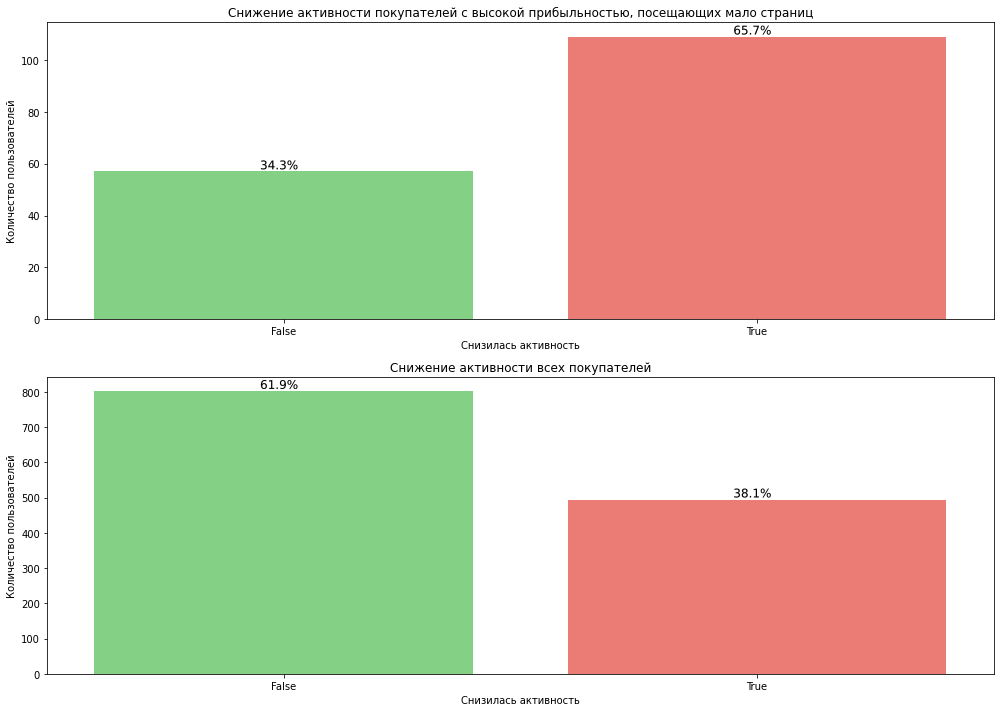

In [127]:
# Настройки графиков
fig, axes = plt.subplots(2, 1, figsize=(14, 10)) 

# Функция для добавления процентов на столбики
def add_percentages(ax, data):
    total = len(data)
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height() + 0.005 * total
        text = ax.annotate(percentage, (x, y), fontsize=12, color='black')
        text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='white', alpha=0.7), path_effects.Normal()])

# Определение  палитры цветов
new_palette = {True: '#FF6961', False: '#77DD77'} 
# График для df_segment
ax1 = sns.countplot(ax=axes[0], x='снизилась_активность', data=df_segment, palette=new_palette)
axes[0].set_title('Снижение активности покупателей с высокой прибыльностью, посещающих мало страниц')
axes[0].set_xlabel('Снизилась активность')
axes[0].set_ylabel('Количество пользователей')
add_percentages(ax1, df_segment)

# График для df_actual
ax2 = sns.countplot(ax=axes[1], x='снизилась_активность', data=df_actual, palette=new_palette)
axes[1].set_title('Снижение активности всех покупателей')
axes[1].set_xlabel('Снизилась активность')
axes[1].set_ylabel('Количество пользователей')
add_percentages(ax2, df_actual)

plt.tight_layout()
plt.show()


В сегменте с высокой прибыльностью, посещающих мало страниц, значительно больший процент покупателей снизил свою активность (**65.7%**) по сравнению со всеми покупателями (**38.1%**).

##### Изучим графики распределения по **наиболее популярным категориям товаров**.

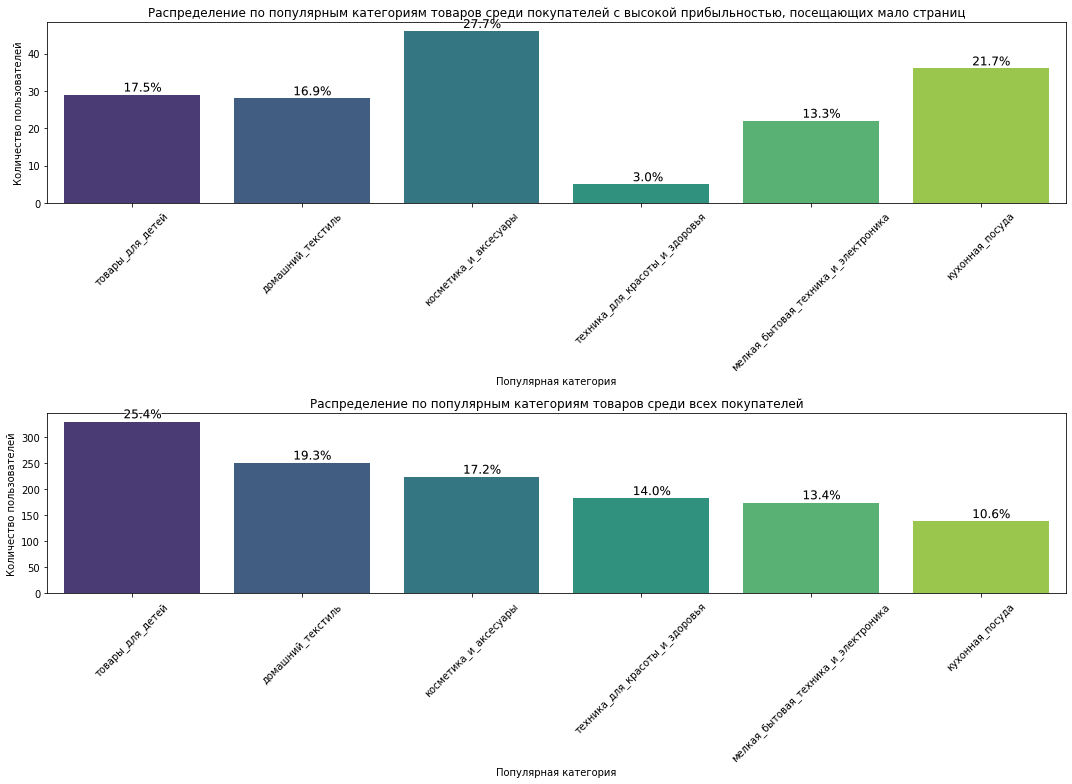

In [128]:
# Определяем общий порядок категорий на основе всех данных
category_order = df_actual['популярная_категория'].value_counts().index

# График распределения по категориям товаров для df_segment
plt.figure(figsize=(15, 11))

# График для df_segment
plt.subplot(2, 1, 1)
ax1 = sns.countplot(x='популярная_категория', data=df_segment, order=category_order, palette='viridis')
plt.title('Распределение по популярным категориям товаров среди покупателей с высокой прибыльностью, посещающих мало страниц')
plt.xlabel('Популярная категория')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)
add_percentages(ax1, df_segment)

# График для df_actual
plt.subplot(2, 1, 2)
ax2 = sns.countplot(x='популярная_категория', data=df_actual, order=category_order, palette='viridis')
plt.title('Распределение по популярным категориям товаров среди всех покупателей')
plt.xlabel('Популярная категория')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)
add_percentages(ax2, df_actual)

plt.tight_layout()
plt.show()


В группе покупателей **с высокой прибыльностью, посещающих мало страниц**, категория **Косметика и аксессуары** является самой популярной (**27.7%**), в то время как среди всех покупателей лидирует категория **Товары для детей** (**25.4%**).
Можно сделать вывод, что в выбранной нами группе больше бездетных женщин, чем в общей выборке. 

##### Изучим графики распределения по **акционным покупкам**.

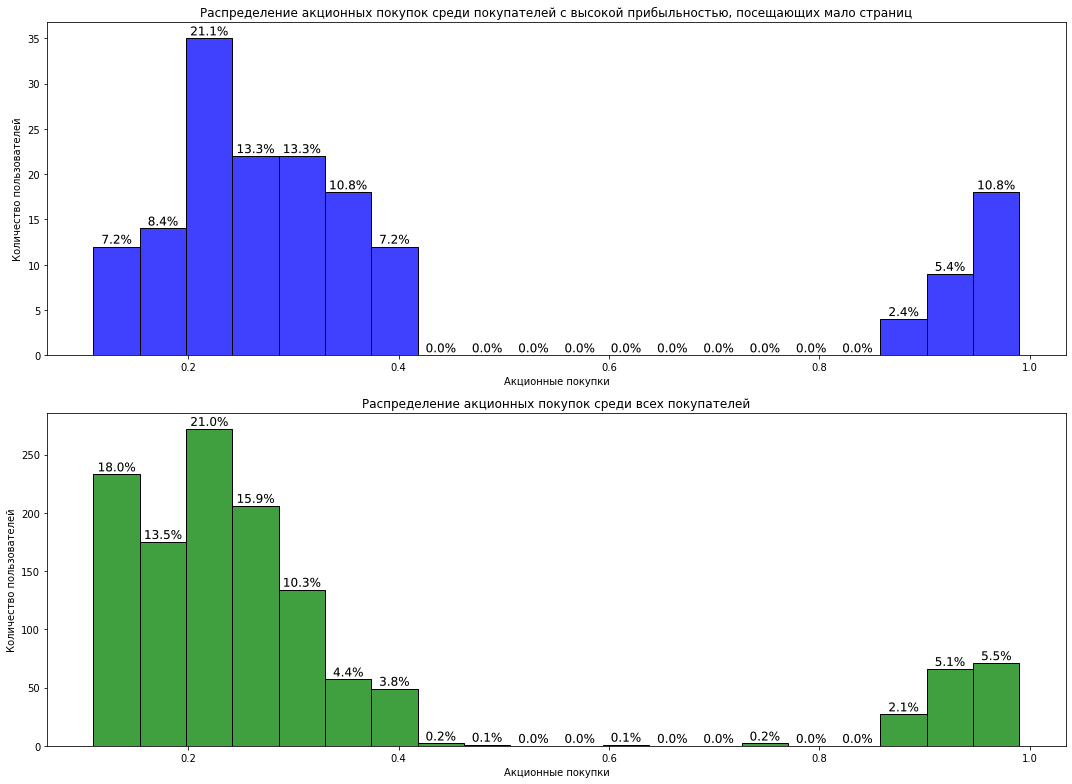

In [129]:

# Функция для добавления процентов на столбцы в гистограмме
def add_percentages_hist(ax, data):
    total = len(data)
    for p in ax.patches:
        height = p.get_height()
        percentage = f'{100 * height / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = height
        text = ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12, color='black')
        # Добавление белой полупрозрачной обводки
        text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='white', alpha=0.7), path_effects.Normal()])

# Настройка графиков
plt.figure(figsize=(15, 11))

# Гистограмма для df_segment
plt.subplot(2, 1, 1)
ax1 = sns.histplot(df_segment['акционные_покупки'], kde=False, bins=20, color='blue')
plt.title('Распределение акционных покупок среди покупателей с высокой прибыльностью, посещающих мало страниц')
plt.xlabel('Акционные покупки')
plt.ylabel('Количество пользователей')
add_percentages_hist(ax1, df_segment['акционные_покупки'])

# Гистограмма для df_actual
plt.subplot(2, 1, 2)
ax2 = sns.histplot(df_actual['акционные_покупки'], kde=False, bins=20, color='green')
plt.title('Распределение акционных покупок среди всех покупателей')
plt.xlabel('Акционные покупки')
plt.ylabel('Количество пользователей')
add_percentages_hist(ax2, df_actual['акционные_покупки'])

plt.tight_layout()
plt.show()


Оба графика имеют наиболее частое значение акционных покупок на уровне **0.2**, но покупатели **с высокой прибыльностью, посещающие мало страниц** имеют больший процент покупателей, совершающих почти **100%** *акционных покупок* (**10.8**% против **5.5**% для всех покупателей).
То есть покупатели в данной категории демонстрируют более высокую склонность к акционным покупкам.

##### Изучим графики распределения по **среднему просмотру категорий за визит**.

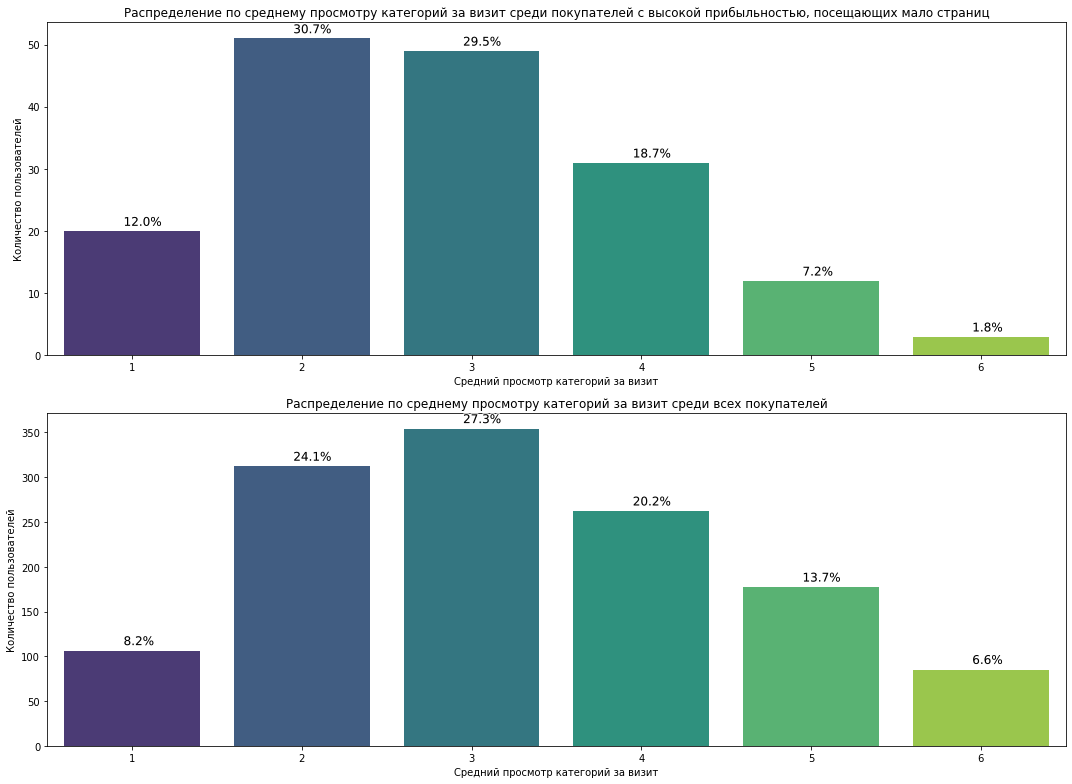

In [130]:
# График распределения по среднему просмотру категорий за визит
plt.figure(figsize=(15, 11))

# График для df_segment
plt.subplot(2, 1, 1)
ax1 = sns.countplot(x='средний_просмотр_категорий_за_визит', data=df_segment, palette='viridis')
plt.title('Распределение по среднему просмотру категорий за визит среди покупателей с высокой прибыльностью, посещающих мало страниц')
plt.xlabel('Средний просмотр категорий за визит')
plt.ylabel('Количество пользователей')
add_percentages(ax1, df_segment)

# График для df_actual
plt.subplot(2, 1, 2)
ax2 = sns.countplot(x='средний_просмотр_категорий_за_визит', data=df_actual, palette='viridis')
plt.title('Распределение по среднему просмотру категорий за визит среди всех покупателей')
plt.xlabel('Средний просмотр категорий за визит')
plt.ylabel('Количество пользователей')
add_percentages(ax2, df_actual)

plt.tight_layout()
plt.show()

В группе **покупателей с высокой прибыльностью, посещающих мало страниц**, чаще просматривают **1**, **2** или **3** страницы за посещение, чем в среднем среди всех пользователей (**12**% против **8.2**%, **30.7**% против **25.1**% и **29.5**% против **20.2**%) и реже **4**, **5**, или **6** страниц (**18.7**% против **20.2**%, **7.2**% против **13.7**% и **1.8**% против **6.6**%). Различия логичны и указывают на то, что покупатели в выбранной группе имеют более сфокусированные интересы, предпочитая просматривать меньше категорий за визит.

##### Изучим графики распределения по **разрешению на сообщения об акциях**.

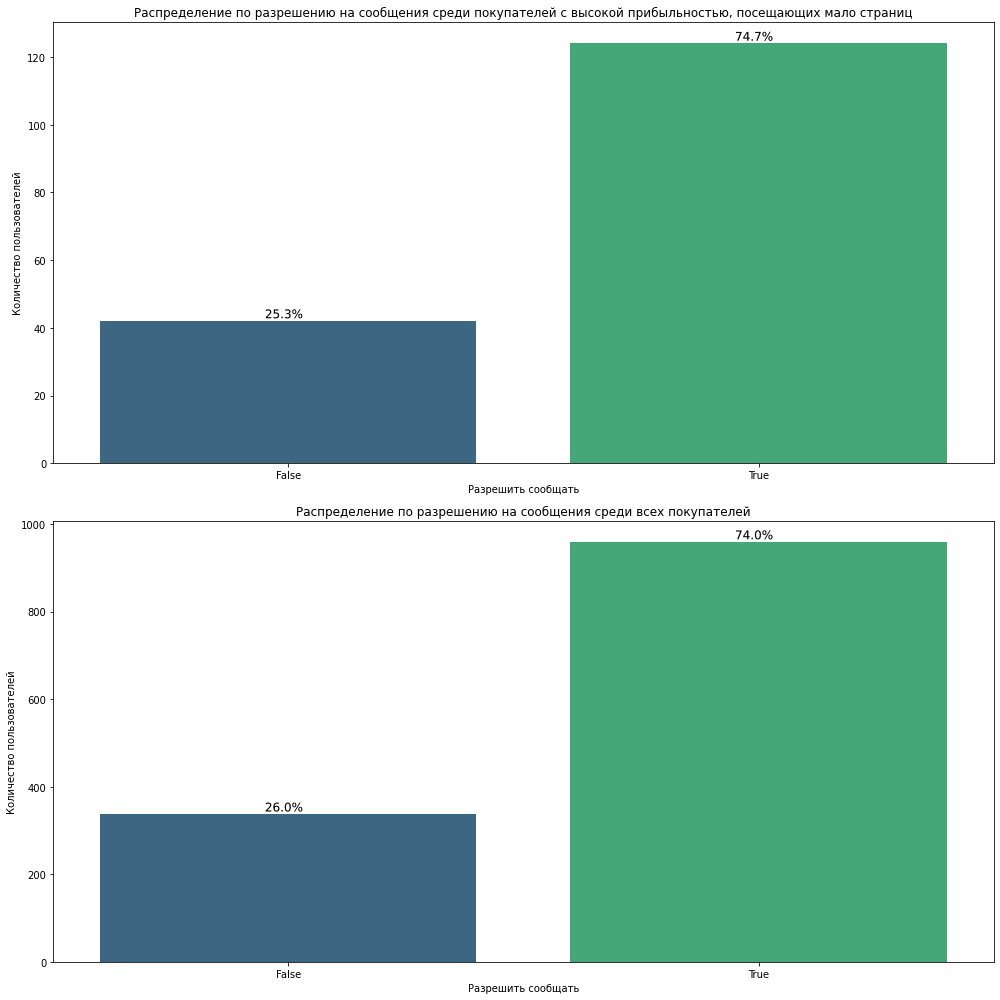

In [131]:
# График распределения по разрешению на сообщения
plt.figure(figsize=(14, 14))

# График для df_segment
plt.subplot(2, 1, 1)
ax1 = sns.countplot(x='разрешить_сообщать', data=df_segment, palette='viridis')
plt.title('Распределение по разрешению на сообщения среди покупателей с высокой прибыльностью, посещающих мало страниц')
plt.xlabel('Разрешить сообщать')
plt.ylabel('Количество пользователей')
add_percentages(ax1, df_segment)

# График для df_actual
plt.subplot(2, 1, 2)
ax2 = sns.countplot(x='разрешить_сообщать', data=df_actual, palette='viridis')
plt.title('Распределение по разрешению на сообщения среди всех покупателей')
plt.xlabel('Разрешить сообщать')
plt.ylabel('Количество пользователей')
add_percentages(ax2, df_actual)

plt.tight_layout()
plt.show()

Графики почти не отличаются. Среди выбранного сегмента процент разрешений на рекламные сообщения незначительно больше, чем среди всех покупателей (**74.7**% против **74**%).

### Предложения по работе с сегментом для увеличения покупательской активности.

- Улучшить представлени таких категорий, как **Косметика и аксессуары** и **Кухонная посуда**. Это самые популярные категории товаров у выбранного сегмента, увеличение ассортимента может привлечь его внимание и стимулировать к большему количеству покупок.
-  Создавать эксклюзивные предложения и скидки на товары категорий **Косметика и аксессуары** и **Кухонная посуда**. Покупатели в выбраном сегменте демонстрируют более высокую склонность к акционным покупкам - процент тех, кто покупает почти эксклюзивно акционные товары почти в 2 раза больше, чем в общей выборке (**10.8**% против **5.5**%).
- Отправлять персонализированные email-рассылки с рекомендациями товаров из категорий, популярных в этой группе. В выбранном сегменте процент тех,  кто дал  согласие на рекламные предложения **74.7**%, что на **0.7**% больше, чем в общей выборке.

### Выводы.

Мы разделили покупателей на 9 сегментов на основе их прибыльности (так как этот показатель интересует нас в первую очередь) и количества посещаемых страниц (так как этот признак в наибольшей степени влияет на снижение активности). Вот все 9 сегментов:

- Низкая прибыльность, мало посещаемых страниц
- Низкая прибыльность, среднее количество посещаемых страниц
- Низкая прибыльность, много посещаемых страниц
- Средняя прибыльность, мало посещаемых страниц
- Средняя прибыльность, среднее количество посещаемых страниц
- Средняя прибыльность, много посещаемых страниц
- Высокая прибыльность, мало посещаемых страниц
- Высокая прибыльность, среднее количество посещаемых страниц
- Высокая прибыльность, много посещаемых страниц

Мы выбрали сегмент **Высокая прибыльность, мало посещаемых страниц**,так как снижение активности этих пользователей ощутимо сократит прибыль компании. Ожидаемо, в данном сегменте значительно больший процент покупателей снизили свою активность (**65.7%**) по сравнению со всеми покупателями (**38.1%**).

В результате анализа  мы дали следующие предложения по работе с сегментом для увеличения покупательской активности:

- Улучшить представлени таких категорий, как **Косметика и аксессуары** и **Кухонная посуда**. Это самые популярные категории товаров у выбранного сегмента, увеличение ассортимента может привлечь его внимание и стимулировать к большему количеству покупок.
-  Создавать эксклюзивные предложения и скидки на товары категорий **Косметика и аксессуары** и **Кухонная посуда**. Покупатели в выбраном сегменте демонстрируют более высокую склонность к акционным покупкам - процент тех, кто покупает почти эксклюзивно акционные товары почти в 2 раза больше, чем в общей выборке (**10.8**% против **5.5**%).
- Отправлять персонализированные email-рассылки с рекомендациями товаров из категорий, популярных в этой группе. В выбранном сегменте процент тех,  кто дал  согласие на рекламные предложения **74.7**%, что на **0.7**% больше, чем в общей выборке.

## Общий вывод.

**Описание задачи**
-Интернет-магазин «В один клик» столкнулся с проблемой снижения покупательской активности постоянных клиентов. Для удержания активности было решено разработать персонализированные предложения на основе анализа данных и бизнес-моделирования. Задача состояла в разработке решения для персонализации предложений постоянным клиентам, чтобы увеличить их покупательскую активность.

**Исходные данные и проведённая предобработка**
-Для исследования использовались данные из нескольких таблиц:

- **market_file.csv**: поведение покупателя на сайте, коммуникации с покупателем, продуктовое поведение.
- **market_money.csv**: данные о выручке.
- **market_time.csv**: данные о времени, проведенном на сайте.
- **money.csv**: данные о среднемесячной прибыли покупателя за последние 3 месяца.

**Предобработка данных включала следующие шаги:**

- Приведение названий столбцов и строковых данных к нижнему регистру и замена пробелов на нижнее подчеркивание.
- Преобразование столбцов с битовыми данными ("снизилась_активность", "премиум", "разрешить_сообщать") к типу boolean.
- Объединение таблиц market_file.csv, market_money.csv и market_time.csv по id.
- Устранение неявных дубликатов и фильтрация клиентов с покупательской активностью не менее трех месяцев (df_actual).
- Поиск лучшей модели


**Для поиска лучшей модели были выполнены следующие шаги:**

- Проведен исследовательский анализ данных (EDA) с использованием гистограмм, диаграмм размаха и столбчатых диаграмм.
- Использованы пайплайны для подготовки данных, обучения моделей, определения лучшей модели и лечших для нее гиперпараметров.
- Проведено обучение и оценка четырех моделей: KNeighborsClassifier, DecisionTreeClassifier, LogisticRegression и SVC.
- Выполнен подбор гиперпараметров для каждой модели с использованием метрики ROC-AUC.
- Выбор лучшей модели на основе ROC-AUC на тестовой выборке.

**Лучшая модель**

- Лучшей моделью была определена **логистическая регрессия** с балансировкой данных через **StandardScaler**. Метрика **ROC-AUC** на обучающей выборке составила **0.899**, а на тестовой выборке — **0.918**.

**Сегментация покупателей**:
Для сегментации покупателей мы использовали результаты моделирования и данные о прибыльности покупателей. Сегментация была проведена по следующим признакам:

- **Прибыльность**: Средняя выручка за текущий и позапрошлый месяцы. Этот показатель интересует нас в первую очередь, так как он напрямую связан с доходами компании.
-  **Количество посещаемых страниц**: Этот признак был выбран, так как в полученой модели он в наибольшей степени влияет на снижение активности.

На основе этих признаков мы разделили покупателей на 9 сегментов:

- Низкая прибыльность, мало посещаемых страниц.
-  Низкая прибыльность, среднее количество посещаемых страниц.
- Низкая прибыльность, много посещаемых страниц.
- Средняя прибыльность, мало посещаемых страниц.
- Средняя прибыльность, среднее количество посещаемых страниц.
- Средняя прибыльность, много посещаемых страниц.
- Высокая прибыльность, мало посещаемых страниц.
- Высокая прибыльность, среднее количество посещаемых страниц.
- Высокая прибыльность, много посещаемых страниц.

Для дальнейшего анализа был выбран сегмент **Высокая прибыльность, мало посещаемых страниц**, так как снижение активности этих пользователей может существенно сократить прибыль компании. 

- В данном сегменте значительно бОльший процент покупателей снизили свою активность (**65.7%**) по сравнению со всеми покупателями (**38.1%**).
- Самой популярной категорией в выбранной группе является **Косметика и аксессуары** (**27.7**%), тогда как среди всех покупателей лидирует категория **Товары для детей**" (**25.4%**).
- Покупатели с **высокой прибыльностью, посещающие мало страниц**, демонстрируют высокую склонность к **акционным покупкам** (**10.8%** против **5.5%** для всех покупателей).
- В выбранном сегменте чаще просматривают меньше категорий за визит, чем в среднем среди всех пользователей.
- Процент тех, кто дал согласие на рекламные предложения в выбранном сегменте, составляет **74.7%**, что на **0.7%** больше, чем в общей выборке.

В результате исследоования даны следующие предложения по работе с сегментом для увеличения покупательской активности:

- Улучшение представления популярных категорий товаров.

Улучшить представление таких категорий, как **Косметика и аксессуары** и **Кухонная посуда**, чтобы привлечь внимание сегмента и стимулировать больше покупок.

- Создание эксклюзивных предложений и скидок:

Создавать эксклюзивные предложения и скидки на товары категорий **Косметика и аксессуары** и **Кухонная посуда**. Покупатели в выбранном сегменте демонстрируют более высокую склонность к акционным покупкам.

- Персонализированные email-рассылки:

Отправлять персонализированные email-рассылки с рекомендациями товаров из категорий, популярных в этой группе. В выбранном сегменте процент тех, кто дал согласие на рекламные предложения, составляет **74.7%**, что чуть больше, чем в общей выборке.


Эти предложения помогут увеличить покупательскую активность и удержание клиентов в выбранном сегменте, что приведет к росту доходов и улучшению общего удовлетворения клиентов.